<a href="https://colab.research.google.com/github/timud/BMWUsedCarPricePrediction/blob/main/Exploring_and_Predicting_Used_Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BMW Used Car Price Prediction Challenge**

**Kaggle Link**: https://www.kaggle.com/danielkyrka/bmw-pricing-challenge

**Context** <br>
>Estimating the value of a used car is one of the main everyday challenges in the automotive business. We believe that the sales price of a car is not only based on the value of the product itself, but is also heavily influenced by things like market trends, current availability. With this challenge we hope to raise some interest in this exciting topic and also gain some insight in what the main factors are that drive the value of a used car.

**Content**<br>
>The data provided consists of almost 5000 real BMW cars that were sold via a b2b auction in 2018. The price shown in the table is the highest bid that was reached during the auction.

>We have already done some data cleanup and filtered out cars with engine damage etc. However there may still be minor damages like scratches, but we do not have more information about that.

>We have also extracted 8 criteria based on the equipment of car that we think might have a good impact on the value of a used car. These criteria have been labeled feature_1 to feature_8 and are shown in the data below.


## Importing Packages

In [5]:
# Importing File Uploader to upload the csv file from my local computer

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# Importing apt modules for numerical and statistical processing
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Print version numbers
print('Numpy Version\t\t\t{}'.format(np.__version__))
print('Pandas Version\t\t\t{}'.format(pd.__version__))
print('Seaborn Version\t\t\t{}'.format(sns.__version__))
print('Matplotlib Version\t\t{}'.format(matplotlib.__version__))

Numpy Version			1.22.4
Pandas Version			1.5.3
Seaborn Version			0.12.2
Matplotlib Version		3.7.1


### Setting Global Parameters

In [7]:
# MATPLOTLIB CONTROL PARAMS
## Plot Size Settings
### Default Figure Size
print('Matplotlib: Original Default Figure Size:\t', plt.rcParams.get('figure.figsize'))

### New Figure Size
plt.rcParams["figure.figsize"] = [6, 3]
print('Matplotlib: New Default Figure Size:\t\t', plt.rcParams.get('figure.figsize'))

print()
print()

## DPI Settings
### Default DPI
print('Matplotlib: Original Default Figure dpi:\t', plt.rcParams.get('figure.dpi'))

### New DPI
plt.rcParams["figure.dpi"] = 150
print('Matplotlib: New Default Figure dpi:\t\t', plt.rcParams.get('figure.dpi'))


# SEABORN CONTROL PARAMS
## Plot Size Settings
sns.set(font_scale=0.7, rc={'figure.figsize':(6,3)})

## Colour Palette
sns.set_palette("Set2")


Matplotlib: Original Default Figure Size:	 [6.4, 4.8]
Matplotlib: New Default Figure Size:		 [6.0, 3.0]


Matplotlib: Original Default Figure dpi:	 100.0
Matplotlib: New Default Figure dpi:		 150.0


## Importing Data

In [8]:
#data_sales=pd.read_csv('bmw_pricing_challenge.csv')
data_sales=pd.read_csv('/content/gdrive/MyDrive/Data Science/Portfolio/01 EDA and Prediction/bmw_pricing_challenge.csv')

data_sales.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


## Overviewing, Preprocessing and Feature Engineering Data

### General Overview of DataFrame

In [9]:
# Overview of data set - column names, number of entries, data types
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


#### Observations:
1. **registration_date** and **sold_at** are saved as objects instead of as dates
2. **feature_1-feature_8**: Are boolean and unknown. Project description doesn't provide any details
3. All variables seem to have no missing values, however this should be further investigated for alternate representations such as 'X's or '?'s to name a few.
<br><br>


#### Steps to be taken:
1. Before proceeding with an exploratory analysis, '**registration_date**' and '**sold_at**' will be converted to date types. The unqiue values will be checked to determine the correct format, and to ensure that there aren't any unexpected values.

### Dealing with the datetime variables

In [10]:
print(data_sales['registration_date'].unique())
print()
print(data_sales['sold_at'].unique())

['2012-02-01' '2016-04-01' '2012-04-01' '2014-07-01' '2014-12-01'
 '2011-05-01' '2009-05-01' '2009-08-01' '2004-07-01' '2013-06-01'
 '2012-09-01' '2009-09-01' '2014-03-01' '2015-08-01' '2009-01-01'
 '2008-04-01' '2015-07-01' '2008-01-01' '2008-03-01' '2013-02-01'
 '2016-01-01' '2014-10-01' '2015-10-01' '2013-05-01' '1995-10-01'
 '2008-08-01' '2010-10-01' '2005-05-01' '2014-04-01' '2001-09-01'
 '2016-03-01' '2008-07-01' '1996-08-01' '2012-01-01' '2008-06-01'
 '2014-05-01' '2012-05-01' '2014-01-01' '2016-07-01' '2015-11-01'
 '2002-01-01' '2015-02-01' '2014-09-01' '2015-03-01' '2012-06-01'
 '2013-01-01' '2013-11-01' '2015-09-01' '2014-11-01' '2011-03-01'
 '2012-03-01' '2009-12-01' '2009-02-01' '2014-08-01' '2014-02-01'
 '2008-09-01' '2007-07-01' '2001-04-01' '2011-12-01' '2009-07-01'
 '2011-09-01' '2007-01-01' '2016-09-01' '2010-11-01' '2013-10-01'
 '2007-11-01' '2009-03-01' '2012-07-01' '2017-11-01' '2010-05-01'
 '2008-05-01' '2015-06-01' '2010-12-01' '2013-03-01' '2014-06-01'
 '2010-07-

#### Observations:
1. It seems as though both dates are in the same format as **YYYY-MM-DD**.
2. All values are from the first of any given month of the year.
3. While there are many **registration_date**'s there is only a handful of **sold_at** dates. There are only 9 dates on which cars were sold. This might be worth exploring.
4. There is a wide variety of registration years for the used cars in the dataset.
5. Since year is better treated as categorical variable, it may be benefitial to calculate the age of the cars rather than look at age. This will be left as a numerical value at the time of analysis but ignored at the time of modeling.

#### Steps to be taken:
1. The relevent columns will be converted to datetime. This should make it easier to process the data with regards to 'time', since Python will understand how to break the values down by month and year, apply some time series analysis. It should also be easier to investigate time related trends such as seasonality.
2. Simultaneously, year and month columns will be generated for '**registration_date**' and the '**sold_at**' date will be converted into a month value only for purposes of simplification, since all sales in the current data occur in the year 2018 on the first of the aforementioned month.
2. The data across the 9 dates of sale will be inspected for trends in the future.
3. Age with respect to the latest **sold_at** date in the dataset will get calculated. Since the age is relative the accuracy in terms of the actual age number will not matter.

In [11]:
# Coverting relevant columns to datetime
data_sales['registration_date'] = pd.to_datetime(data_sales['registration_date'])
data_sales['sold_at'] = pd.to_datetime(data_sales['sold_at'])

# Extracting registration year and month
data_sales['registration_year'] = data_sales['registration_date'].dt.year
data_sales['registration_month'] = data_sales['registration_date'].dt.month

# Extracting sales month
data_sales['sold_month'] = data_sales['sold_at'].dt.month

# Calculating Age wrt latest sold_at date in dataset and converting to int64 type
data_sales['age'] = data_sales['sold_at'] - data_sales['registration_date']
data_sales['age'] = data_sales['age'].dt.days

print(data_sales.dtypes)
print()
data_sales.head()

maker_key                     object
model_key                     object
mileage                        int64
engine_power                   int64
registration_date     datetime64[ns]
fuel                          object
paint_color                   object
car_type                      object
feature_1                       bool
feature_2                       bool
feature_3                       bool
feature_4                       bool
feature_5                       bool
feature_6                       bool
feature_7                       bool
feature_8                       bool
price                          int64
sold_at               datetime64[ns]
registration_year              int64
registration_month             int64
sold_month                     int64
age                            int64
dtype: object



,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_5,feature_6,feature_7,feature_8,price,sold_at,registration_year,registration_month,sold_month,age
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,...,True,True,True,False,11300,2018-01-01,2012,2,1,2161
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,...,False,True,True,True,69700,2018-02-01,2016,4,2,671
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,...,True,False,True,False,10200,2018-02-01,2012,4,2,2132
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,...,True,True,True,True,25100,2018-02-01,2014,7,2,1311
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,...,False,True,True,True,33400,2018-04-01,2014,12,4,1217


### Inspecting and Treating Numerical, Unique and Duplicate Entries

Numerical Values

In [12]:
# Getting a summary of all the numerical values
round(data_sales.describe(), 2)

,mileage,engine_power,price,registration_year,registration_month,sold_month,age
count,4843.00,4843.00,4843.00,4843.00,4843.00,4843.00,4843.00
mean,140962.80,128.99,15828.08,2012.47,6.13,4.93,1983.72
std,60196.74,38.99,9220.29,2.53,3.32,2.16,927.28
min,-64.00,0.00,100.00,1990.00,1.00,1.00,215.00
25%,102913.50,100.00,10800.00,2012.00,3.00,3.00,1489.00
50%,141080.00,120.00,14200.00,2013.00,6.00,5.00,1765.00
75%,175195.50,135.00,18600.00,2014.00,9.00,7.00,2130.00
max,1000376.00,423.00,178500.00,2017.00,12.00,9.00,10258.00


Unique Values

In [13]:
# Printing the unique values for all columns
for col in data_sales:
  print(col)
  print(data_sales[col].sort_values().unique())
  print()

maker_key
['BMW']

model_key
['114' '116' '118' '120' '123' '125' '135' '214 Gran Tourer' '216'
 '216 Active Tourer' '216 Gran Tourer' '218' '218 Active Tourer'
 '218 Gran Tourer' '220' '220 Active Tourer' '225' '225 Active Tourer'
 '316' '318' '318 Gran Turismo' '320' '320 Gran Turismo' '325'
 '325 Gran Turismo' '328' '330' '330 Gran Turismo' '335'
 '335 Gran Turismo' '418 Gran Coupé' '420' '420 Gran Coupé' '425' '430'
 '430 Gran Coupé' '435' '435 Gran Coupé' '518' '520' '520 Gran Turismo'
 '523' '525' '528' '530' '530 Gran Turismo' '535' '535 Gran Turismo' '630'
 '635' '640' '640 Gran Coupé' '650' '730' '735' '740' '750'
 'ActiveHybrid 5' 'M135' 'M235' 'M3' 'M4' 'M5' 'M550' 'X1' 'X3' 'X4' 'X5'
 'X5 M' 'X5 M50' 'X6' 'X6 M' 'Z4' 'i3' 'i8']

mileage
[    -64     476     612 ...  477571  484615 1000376]

engine_power
[  0  25  66  70  75  77  80  85  87  90  95 100 101 105 107 110 112 119
 120 121 122 125 127 130 135 137 140 141 142 145 150 155 160 170 173 180
 183 189 190 192 195 200 21

Duplicate Values

In [14]:
print('Number of duplicate entries:')
sum(data_sales.duplicated())

Number of duplicate entries:


0

#### Observations:
1. **maker_key** only has one value - 'BMW' since this is specifically a BMW dataset. This variable adds no value to the dataset and can be dropped.
2. **feature_1**-**feature_8** seem to have unexpected spaces before 'True' values and none before 'False' values, however since Python seems to recognise these variables as boolean, this may not be an issue for processing purposes.
3. No missing values in alternative representations such as 'X' or '?'.
4. No duplicate rows in the dataset.
5. In the numerical summary, **mileage** has a minimum value of -64. Since mileage can only be 0 or higher, it could be assumed that this is a typo. The value should either be converted to 0 or to 64. It is more likely that the value should be +64. The suspicious entries could either be dropped or 'fixed' by converting to +64.
6. **engine_power** also looks to be suspicious, as there is a 0 value as well as some very low engine horsepower numbers which most likely are not correct. Once again suspicious rows could either be corrected, dropped, or in some cases treated as genuine.
7. Looking at **model_key**, there are different variants of models across different series. For example, the 3 series includes - '320, 320 Grand Tourismo'. Then there are also the sports variants such as 'M3, M4' which could be classified as M cars. M cars are performance oriented/sports cars that are typically more expensive than their standard counterparts.

#### Steps to be taken:
1. Drop **maker_key** column.
2. Check **mileage** and **engine_power** for suspicious values. In case of a small number of suspicious entries, the entries could be dropped. This should also imporve the likelihood of any applied model to be better at generalising data and hence predictions.
3. Create classifications for the different model series. This may or may not be used for modeling.

Dropping '**maker_key**'

In [15]:
# Dropping column maker_key
data_sales.drop(['maker_key'], axis=1, inplace=True)
data_sales.columns

Index(['model_key', 'mileage', 'engine_power', 'registration_date', 'fuel',
       'paint_color', 'car_type', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'price', 'sold_at', 'registration_year', 'registration_month',
       'sold_month', 'age'],
      dtype='object')

Inspecting suspicious entires for '**mileage**'

In [16]:
data_sales['mileage'].value_counts().sort_index()

-64         1
 476        1
 612        1
 706        1
 2399       1
           ..
 405816     1
 439060     1
 477571     1
 484615     1
 1000376    1
Name: mileage, Length: 4786, dtype: int64

Since there is a singular entry of -64 mileage, dropping the entire entry should not affect the data in terms of analysis or model training.

In [17]:
# Dropping the singular suspicious entry containing -64 mileage
data_sales = data_sales[data_sales['mileage']>=0]
print(data_sales.shape)

(4842, 21)


Inspecting suspicious entires for **engine_power**

In [18]:
data_sales['engine_power'].value_counts().sort_index().head(10)

0       1
25      2
66      2
70     11
75      9
77      3
80      4
85    631
87      6
90     40
Name: engine_power, dtype: int64

Since there is a singular entry of 0 engine power, dropping the entire entry should not affect the data in terms of analysis or model training.

In [19]:
# Dropping the singular suspicious entry containing 0 engine power
data_sales = data_sales[data_sales['engine_power']>0]
print(data_sales.shape)

(4841, 21)


Visualising Variables

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [21]:
data_sales.select_dtypes(include=numerics)

,mileage,engine_power,price,registration_year,registration_month,sold_month,age
0,140411,100,11300,2012,2,1,2161
1,13929,317,69700,2016,4,2,671
2,183297,120,10200,2012,4,2,2132
3,128035,135,25100,2014,7,2,1311
4,97097,160,33400,2014,12,4,1217
...,...,...,...,...,...,...,...
4838,39743,110,14600,2015,10,8,1035
4839,49832,100,17500,2015,6,8,1157
4840,19633,110,17000,2015,10,9,1066
4841,27920,110,22700,2016,4,9,883


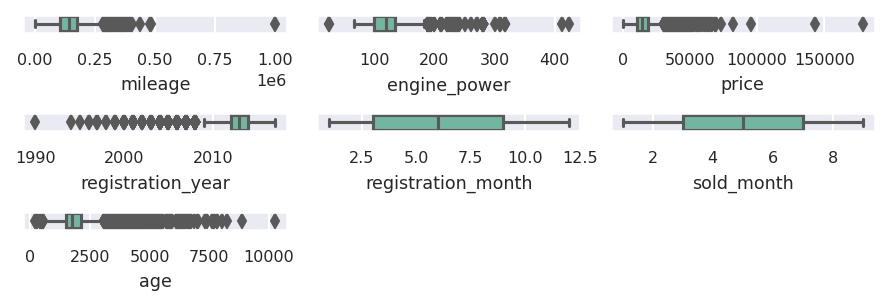

<Figure size 1050x1050 with 0 Axes>

In [22]:
# Visualise distributions of all numeric values through boxplots
for i, col in enumerate(data_sales.select_dtypes(include=numerics).columns):

  # Plot in a Grid
  plt.subplot(5, 3, i+1)
  sns.boxplot(data=data_sales, x=col)

plt.tight_layout()
plt.figure(figsize=(7,7))
plt.show()

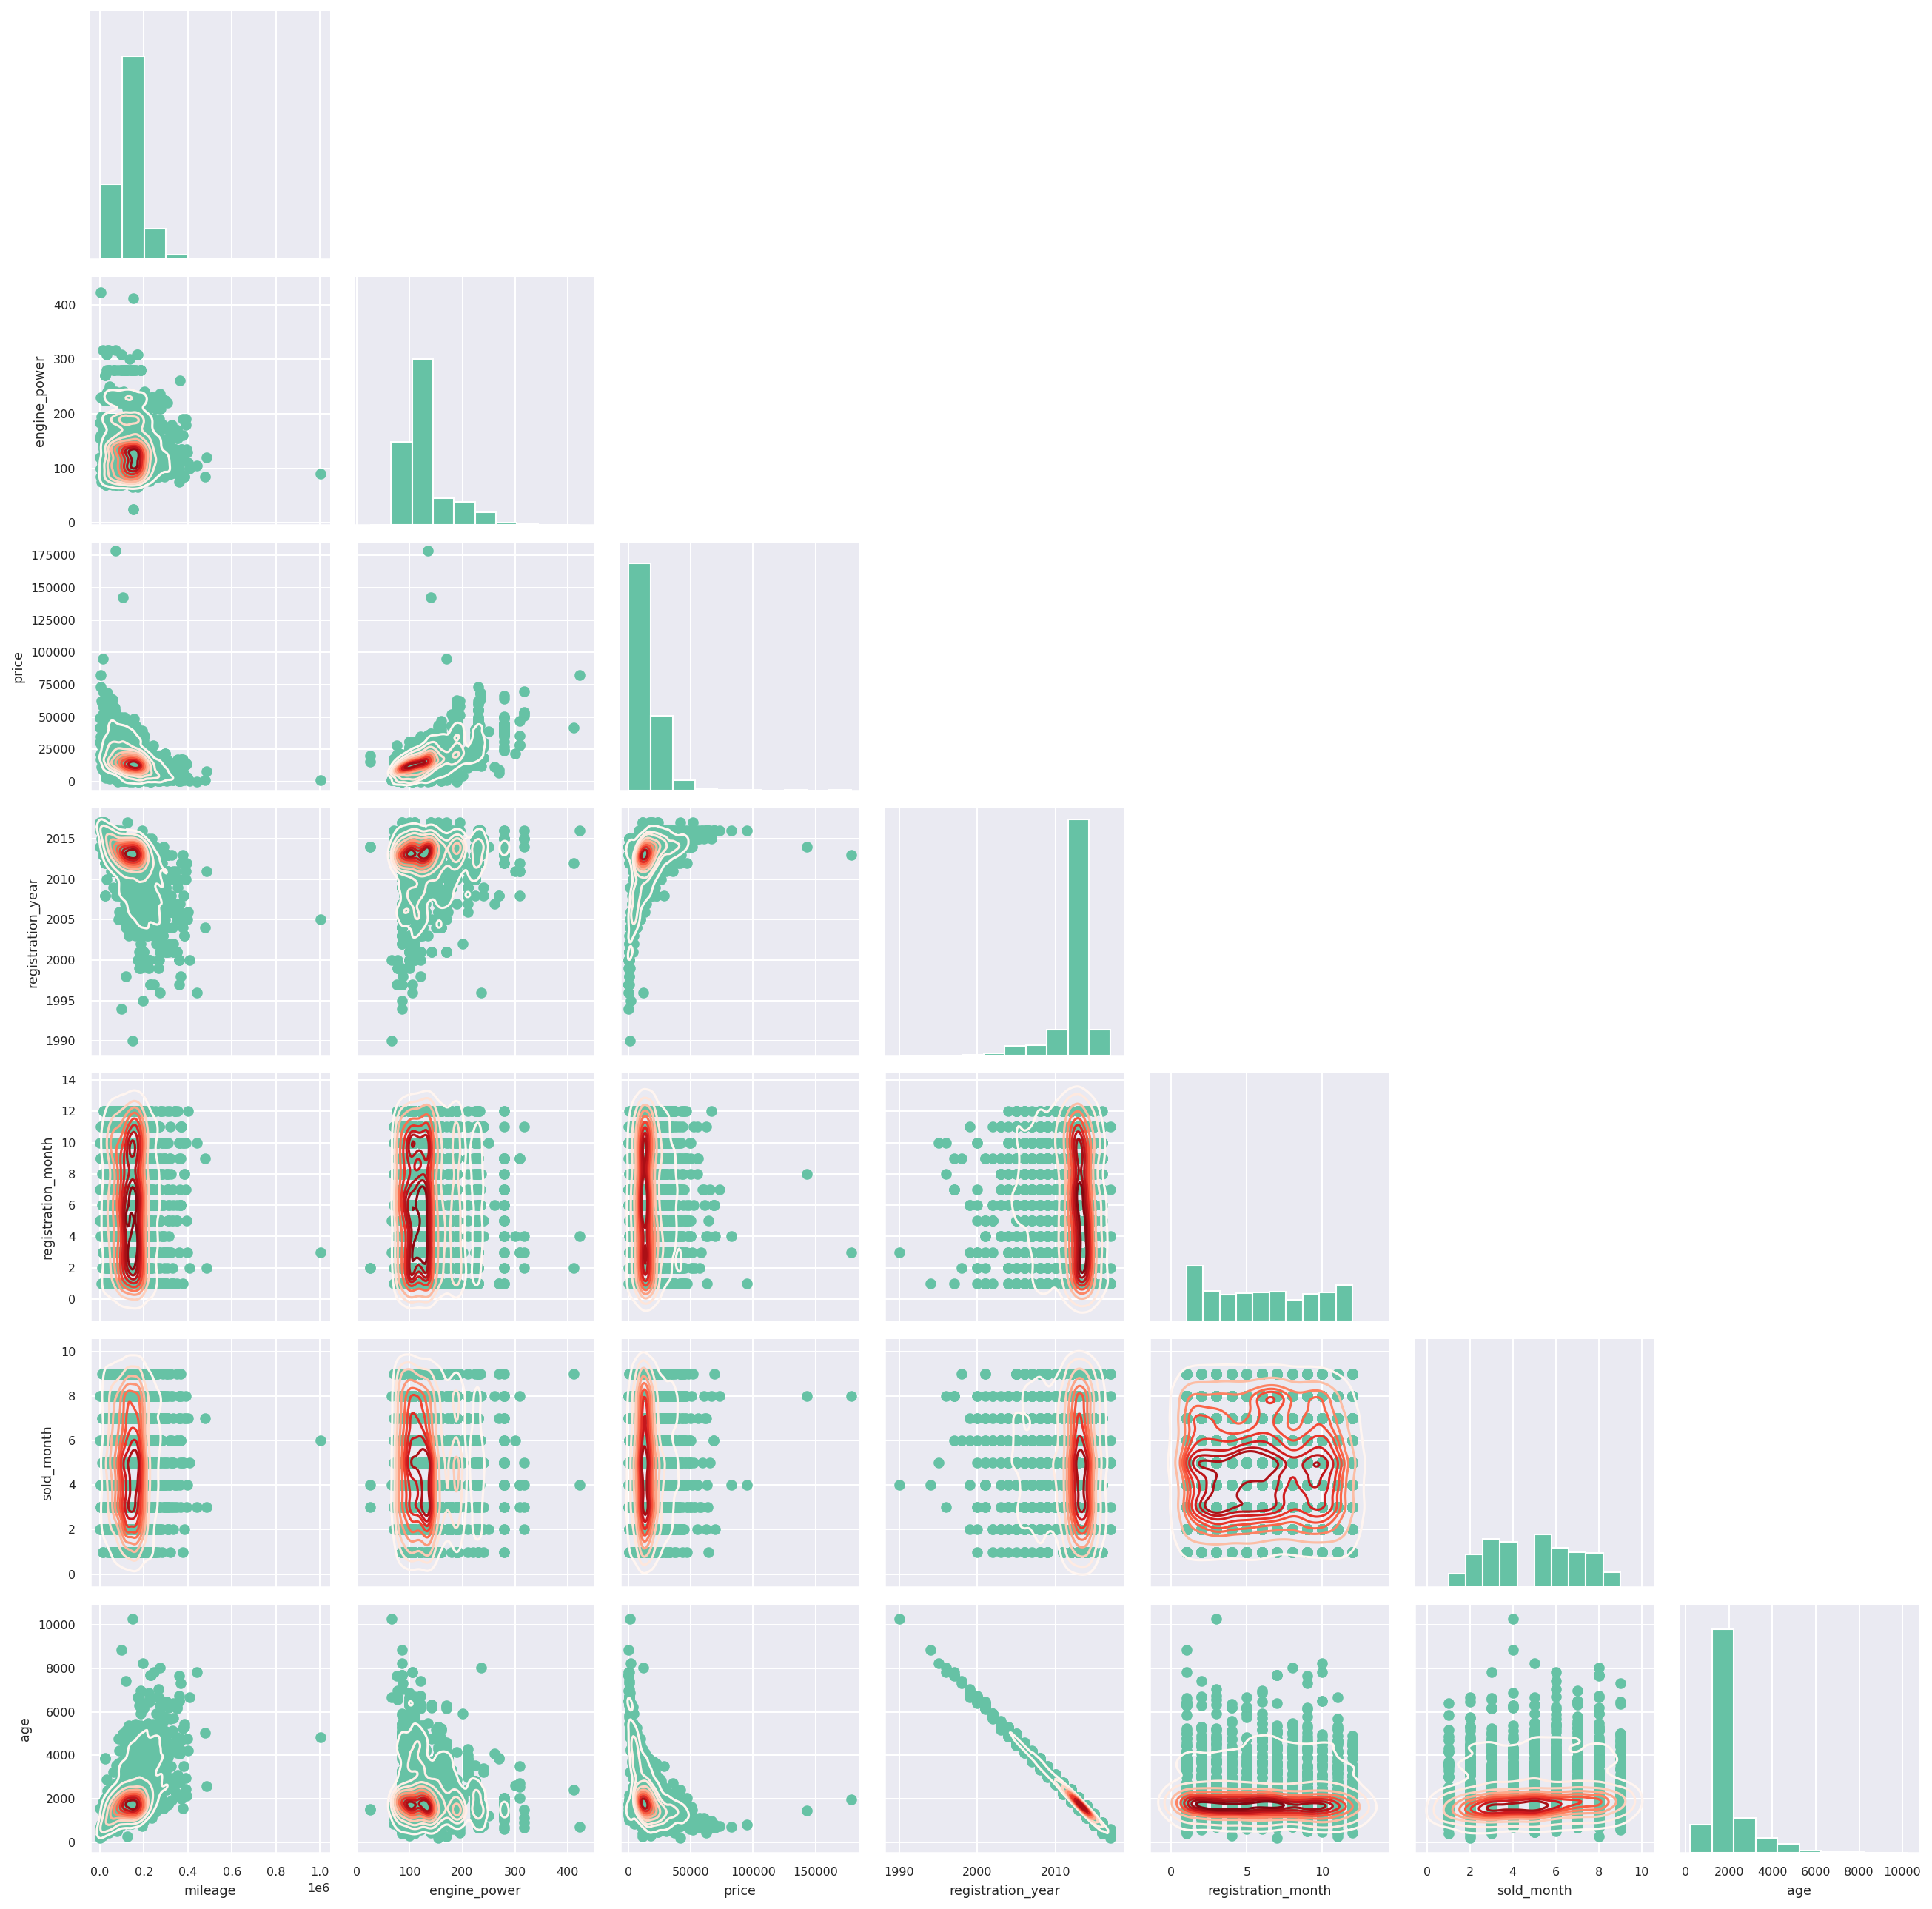

In [23]:
# Visualise relationships and frequencies amidst the numerical variables
## using scatter, density and histogram plots
plot1_exploratory_PairGrid = sns.PairGrid(data=data_sales.select_dtypes(include=numerics), corner=True)
plot1_exploratory_PairGrid.map_upper(plt.scatter)
plot1_exploratory_PairGrid.map_diag(plt.hist)
plot1_exploratory_PairGrid.map_lower(plt.scatter)
plot1_exploratory_PairGrid.map_lower(sns.kdeplot, cmap = 'Reds')

<Axes: >

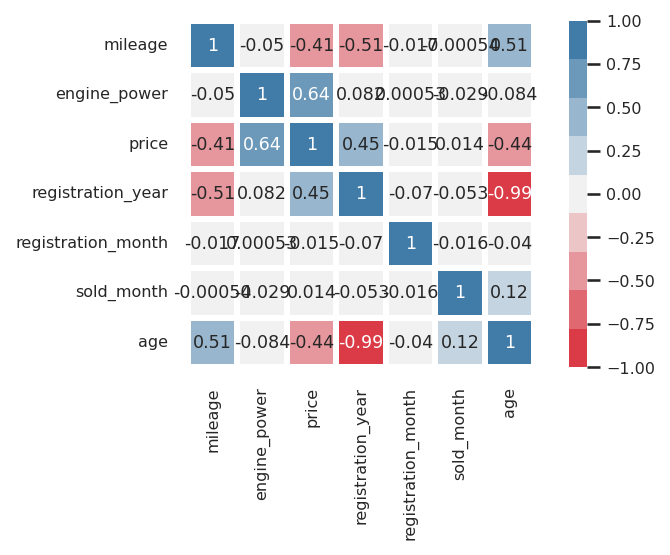

In [24]:
# Visualise correlations amidst the numerical variables
sns.heatmap(
    data=data_sales.select_dtypes(include=numerics).corr(),
    cmap=sns.diverging_palette(10, 240, n=9),
    linewidths=2,
    annot=True,
    vmin=-1,
    vmax=1,
    square=True)

#### Observations:
1. Each of the numerical values has outliers mostly towards the upper end of their respective ranges, except for '**registration_year**'.
2. All numerical variables seem to be positively skewed, except for '**registration_year**', which is negatively skewed.
3. Each of the plots indicate some extreme outliers. These are far beyond the usual outliers and far away from the distribution. These shall be investigated.
4. The only relevant strong correlations(negative or positive) are the ones between:
  1. **price** and **mileage**
  2. **price** and **engine_power**
  2. **registration_year**/**age** and **mileage**
  3. **registration_year**/**age** and **price**
5. **registration_year** and **age** are colinear and hence **registration_year** could be dropped. **age** could potentially have more info as the value would be more exact as opposed to **registration_date**.
6. **registration_month** and **sold_month** seem to not have any correlation with price, suggesting that they might be insignificant and be dropped. **age** might be a more useful independent variable when comparing with **price**.
7. With the generation of **age**, the **registration_date** and **sold_at** features could be dropped.
8. It is interesting to see that there is not much indication of a trend of inflation or market trend judging by the **registration_year** vs **price** scatter-density plot. This might be the case since the dataset concerns used cars and not new cars.

#### Steps to be taken:
1. Drop **registration_date** and **sold_at**, as well as the derivative values of **registration_month**, **registration_year** and **sold_month**

In [25]:
# Dropping uneeded features
data_sales = data_sales.drop(columns=['registration_date', 'sold_at', 'registration_year', 'registration_month', 'sold_month'])

### Overviewing Categorical Variables

In [26]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model_key     4841 non-null   object
 1   mileage       4841 non-null   int64 
 2   engine_power  4841 non-null   int64 
 3   fuel          4841 non-null   object
 4   paint_color   4841 non-null   object
 5   car_type      4841 non-null   object
 6   feature_1     4841 non-null   bool  
 7   feature_2     4841 non-null   bool  
 8   feature_3     4841 non-null   bool  
 9   feature_4     4841 non-null   bool  
 10  feature_5     4841 non-null   bool  
 11  feature_6     4841 non-null   bool  
 12  feature_7     4841 non-null   bool  
 13  feature_8     4841 non-null   bool  
 14  price         4841 non-null   int64 
 15  age           4841 non-null   int64 
dtypes: bool(8), int64(4), object(4)
memory usage: 378.2+ KB


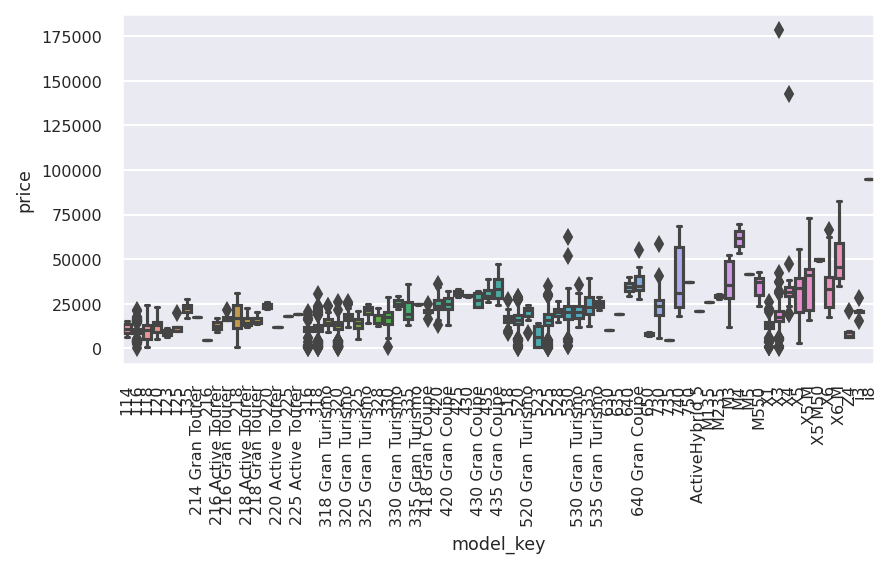

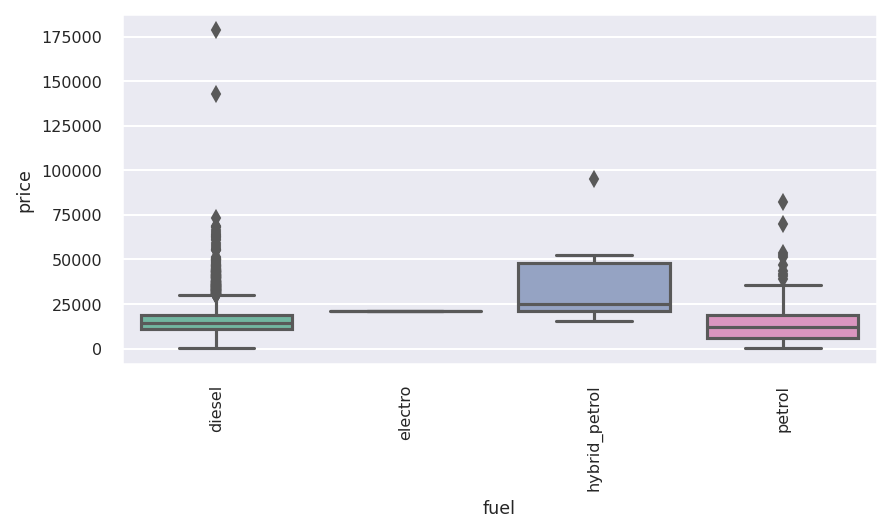

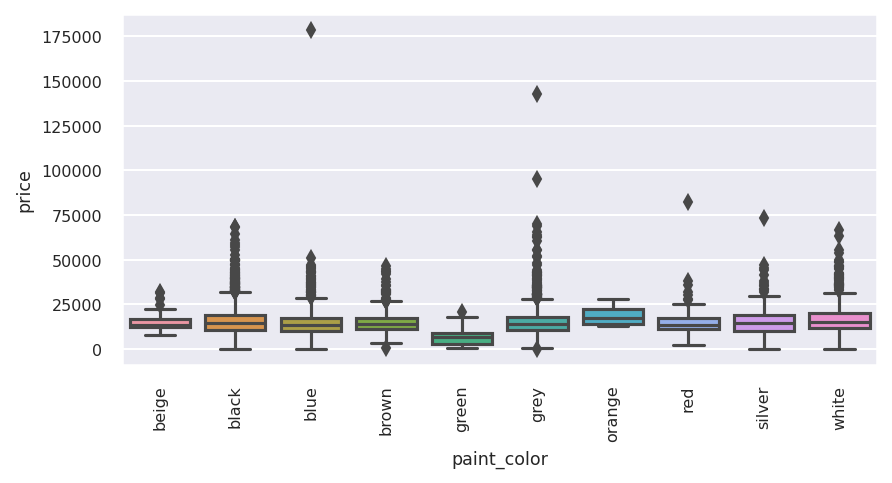

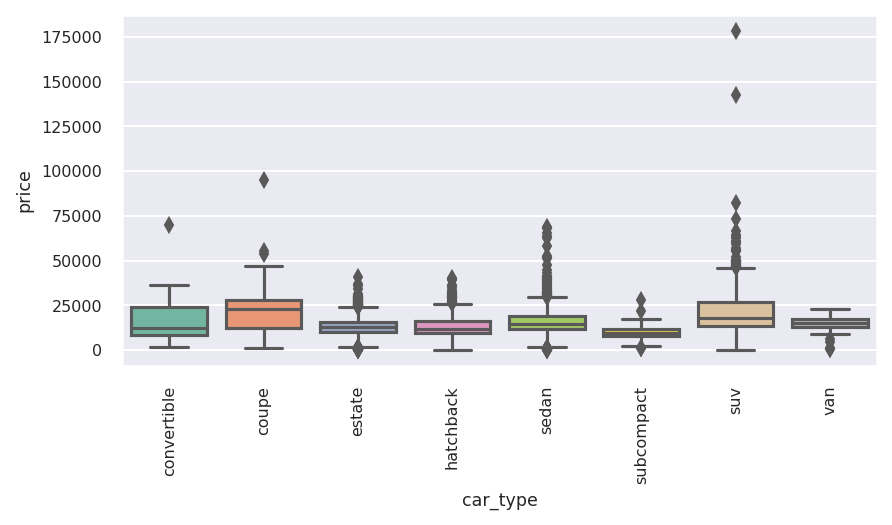

In [27]:
for col in data_sales.select_dtypes('object').columns:
  sns.boxplot(data=data_sales.sort_values(col), y='price', x=col)
  plt.tight_layout()
  plt.xticks(rotation=90)
  plt.show()

#### Observations:
1. There are a few data points that appear to be **outliers**, with prices above 90,000.
2. Looking at the boxplot of '**model_key**', it seems as though there are some car models that have a very low variance and some with very high variance in price. There are outliers scattered across the plot, however the outliers mentioned above in the first observation seem to stick out a lot with respect to the same model. These could potentially be errors or edge cases. It is also observed, as expected, that the price rise is higher as car models get more premium. The data could be categorised on the basis of the series of the car for example, the 5 series range has its own price range with variants within it of varying prices. This distinction could help models predict prices better.
3. Looking at the boxplot of  '**fuel**', hybrid_petrol and electro have higher prices than diesel and petrol powered cars. This makes reasonable sense, since these are newer technologies, most likely present in newer cars and hence are more expensive, at least this happens to be the case at the time of writing of this code.
4. '**fuel**': diesel cars seem to have the largest number of outliers, including the aforementioned extreme outliers.
5. '**fuel**': hybrid_petrol seem to have prices very positively skewed.
6. Looking at the '**paint_color**' plot, it seems as though prices have slight variances across the range.
7. Looking into '**car_type**', convertible, coupe and suv have the highest amount of variance, with all other categories having relatively lower variance.
8. There are also 'M' cars which are sports cars/performance oriented cars which are typically more expensive due to the parts used in these cars and the fact that they are rarer and more desirable.

#### Steps to be taken:
1. Investigate the extreme outliers and treat if necessary.
2. Generate a 'series' variable.
3. Generate an 'M' car variable.

Dealing with some extreme outilers

In [28]:
# Reviewing the extreme outliers
data_sales[data_sales['price']>=90000]

,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,age
90,i8,12402,170,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200,821
4684,X4,103222,140,diesel,grey,suv,True,True,False,False,True,False,True,True,142800,1461
4753,X3,72515,135,diesel,blue,suv,False,False,True,False,False,False,False,True,178500,1979


#### Observations:
1. The extreme outliers comprise only of 3 data points.
2. One of these is the BMW i8, one of the newer, flagship models registered in 2016 and sold in 2018.
2. The other cars are the X4 (price=142800) and X3 (price=178500). These are amongst BMW's midrange vehicles, and as indicated by the boxplot, these two data points are far beyond the expected range for the respective models. These cars are also relatively old, and would not even cost close to these prices while being sold brand new. Considering that these two points are for relatively average cars, the high price is an anomaly. While it is possible that these cars were modified or had some other treatment that could've raised their prices, it is reasonable to assume that they are not representative of the remainder of the data and are best excluded.

#### Steps to be taken:
1. Remove the extreme outliers ('X4' and 'X3').
2. Step carried over from previous note - generate 'series' and 'M' car variable.

In [29]:
data_sales.drop((data_sales[data_sales['price']>100000]).index, inplace=True)
(data_sales[data_sales['price']>90000])

,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,age
90,i8,12402,170,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200,821


Generating **series** variable

In [30]:
np.sort(data_sales['model_key'].unique())

array(['114', '116', '118', '120', '123', '125', '135', '214 Gran Tourer',
       '216', '216 Active Tourer', '216 Gran Tourer', '218',
       '218 Active Tourer', '218 Gran Tourer', '220', '220 Active Tourer',
       '225', '225 Active Tourer', '316', '318', '318 Gran Turismo',
       '320', '320 Gran Turismo', '325', '325 Gran Turismo', '328', '330',
       '330 Gran Turismo', '335', '335 Gran Turismo', '418 Gran Coupé',
       '420', '420 Gran Coupé', '425', '430', '430 Gran Coupé', '435',
       '435 Gran Coupé', '518', '520', '520 Gran Turismo', '523', '525',
       '528', '530', '530 Gran Turismo', '535', '535 Gran Turismo', '630',
       '635', '640', '640 Gran Coupé', '650', '730', '735', '740', '750',
       'ActiveHybrid 5', 'M135', 'M235', 'M3', 'M4', 'M5', 'M550', 'X1',
       'X3', 'X4', 'X5', 'X5 M', 'X5 M50', 'X6', 'X6 M', 'Z4', 'i3', 'i8'],
      dtype=object)

In [31]:
# Creating lists of different model classifications
series_1 = ['114', '116', '118', '120', '123', '125', '135',
            'M135']
series_2 = ['214 Gran Tourer', '216', '216 Active Tourer', '216 Gran Tourer',
            '218', '218 Active Tourer', '218 Gran Tourer', '220',
            '220 Active Tourer', '225', '225 Active Tourer',
            'M235']
series_3 = ['316', '318', '318 Gran Turismo', '320', '320 Gran Turismo',
            '325', '325 Gran Turismo', '328', '330','330 Gran Turismo', '335',
            '335 Gran Turismo',
            'M3']
series_4 = ['418 Gran Coupé', '420', '420 Gran Coupé', '425', '430',
            '430 Gran Coupé', '435', '435 Gran Coupé',
            'M4']
series_5 = ['518', '520', '520 Gran Turismo', '523', '525', '528', '530',
            '530 Gran Turismo', '535', '535 Gran Turismo', 'ActiveHybrid 5',
            'M5', 'M550']
series_6 = ['630', '635', '640', '640 Gran Coupé', '650']
series_7 = ['730', '735', '740', '750']
series_x = ['X1', 'X3', 'X4', 'X5', 'X6',
            'X5 M', 'X6 M', 'X5 M50']
series_z = ['Z4']
series_i = ['i3', 'i8']

list_of_series=['series_1', 'series_2', 'series_3', 'series_4', 'series_5', 'series_6', 'series_7', 'series_x', 'series_z', 'series_i']

# Classifier function - classifies car models into their respective series
def classifier_carseries(carmodel):
  if carmodel in series_1:
    return 'series_1'
  elif carmodel in series_2:
    return 'series_2'
  elif carmodel in series_3:
    return 'series_3'
  elif carmodel in series_4:
    return 'series_4'
  elif carmodel in series_5:
    return 'series_5'
  elif carmodel in series_6:
    return 'series_6'
  elif carmodel in series_7:
    return 'series_7'
  elif carmodel in series_x:
    return 'series_x'
  elif carmodel in series_z:
    return 'series_z'
  elif carmodel in series_i:
    return 'series_i'
  else:
    return 'unknown'

# Applying the function over each row
data_sales['car_series']=data_sales['model_key'].apply(classifier_carseries)
data_sales.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,age,car_series
0,118,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2161,series_1
1,M4,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,671,series_4
2,320,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2132,series_3
3,420,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,1311,series_4
4,425,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,1217,series_4


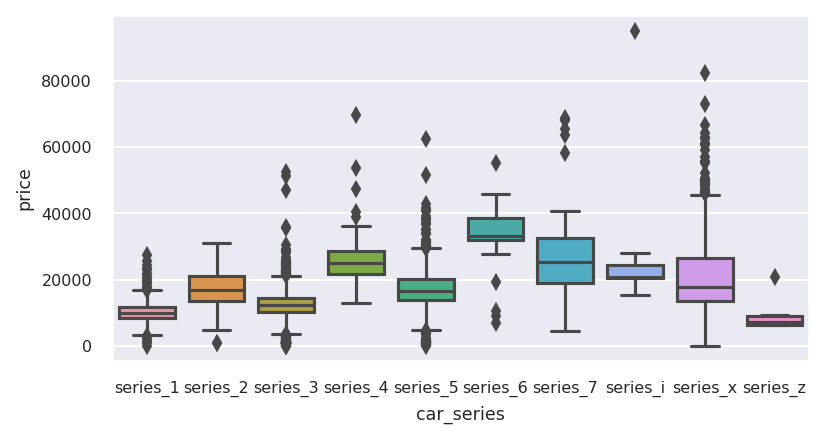

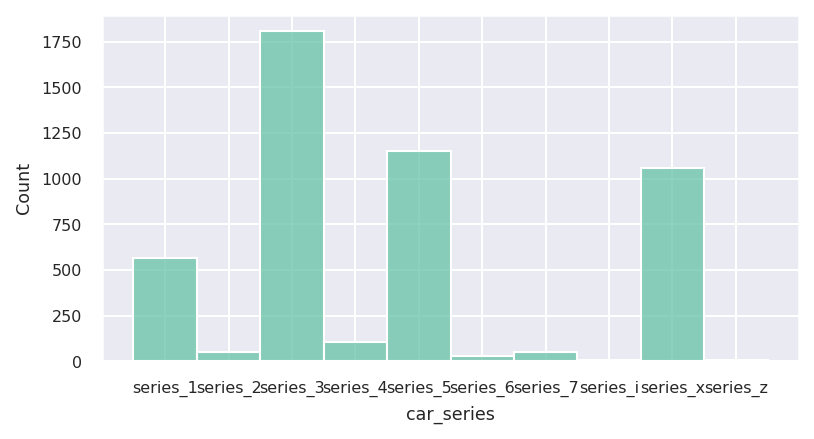

In [32]:
# Quick overview of the difference in prices for different series of cars
sns.boxplot(data=data_sales.sort_values('car_series'), y='price', x='car_series')
plt.show()

# Quick overview of the frequncies/availability of different series of cars
sns.histplot(data=data_sales.sort_values('car_series'), x='car_series')
plt.show()

In [33]:
# Creating a list of M cars which are the performance models of the BMWs cars
m_cars=['M135', 'M235', 'M3', 'M4', 'M5', 'X5 M', 'X6 M', 'M550', 'X5 M50']
# m_cars=['M135', 'M235', 'M3', 'M4', 'M5', 'X5 M', 'X6 M']

# Creating a function that classifies cars as m_cars or regular cars
def classifier_m_car(carmodel):
  if carmodel in m_cars:
    return 1
  else:
    return 0


# Applying the function over each row
data_sales['m_car']=data_sales['model_key'].apply(classifier_m_car)

# Verifying changes
print(data_sales[data_sales['m_car']==1][['model_key', 'm_car']].head(5))
print()
print(data_sales[data_sales['m_car']==0][['model_key', 'm_car']].head(5))

   model_key  m_car
1         M4      1
41        M3      1
57      M235      1
67        M3      1
72        M4      1

  model_key  m_car
0       118      0
2       320      0
3       420      0
4       425      0
5       335      0


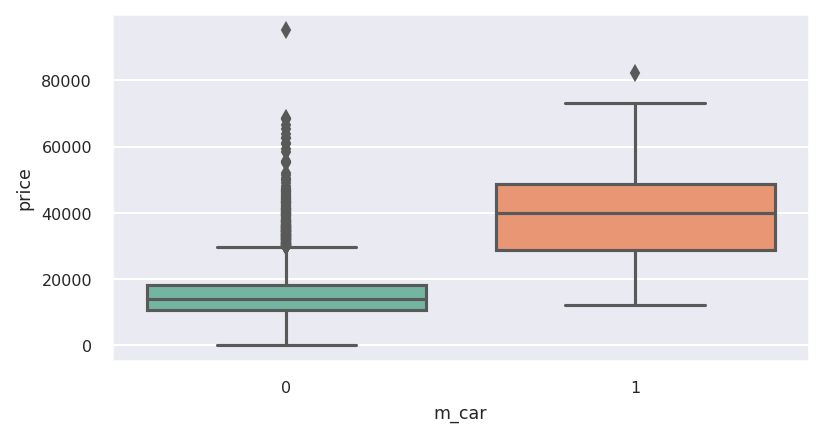

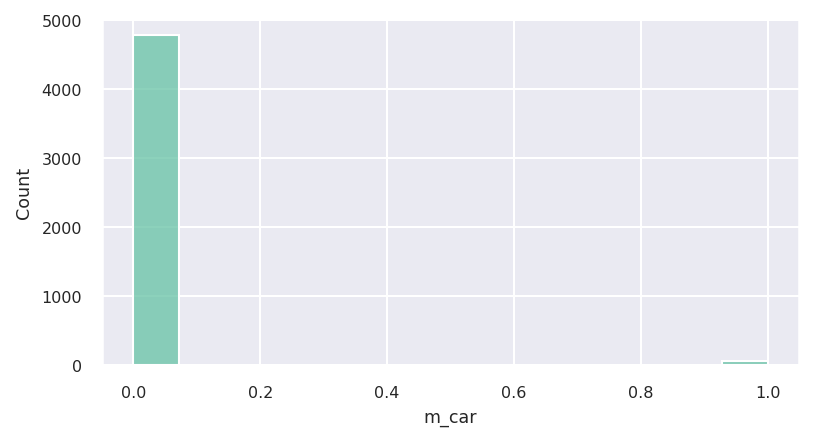

In [34]:
# Quick overview of the difference in prices for m_cars vs regular cars
sns.boxplot(data=data_sales, y='price', x='m_car')
plt.show()

# Quick overview of the frequencies/availablitiy of m_cars vs regular cars
sns.histplot(data=data_sales, x='m_car')
plt.show()

#### Observations:
1. The even numbered **car_series** typically have higher pricing than their odd numbered counterparts. The odd numbered series are also a lot more common barring the 'series_7'.
2. The 'series_z' series of cars which is long-since deprecated, according to research, has a lower price value possibly since the cars within that category are old and not highly coveted.
3. **m_car**'s are quite a lot more expensive than regular cars and a lot rarer.

## Predicting the Prices

A few different methods will be used such as Linear Regression, some Tree based Regression Models and Neural Networks.

#### Importing Packages

In [35]:
# Importing Packages to Prepare Data for Modeling
from sklearn.model_selection import train_test_split

# Importing Packages to Investigate Model Performance
from sklearn import metrics

# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Importing Decision Regression Tree
from sklearn import tree

# Import Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Import XGBoost
from xgboost import XGBRegressor

# Import Module to help Hyperparameter Search
from sklearn.model_selection import GridSearchCV

### Helper Functions to Automate Common Tasks

#### Split Data into Training and Test Sets

In [36]:
# Splitting Data 80% Training and 20% Testing by default, however this can be changed
# Creates 4 dfs - x_train, x_test, y_train, y_test, y_pred
def split_data(df, test_df_size=0.2, random_state=11, diagnostics=True):

  # Initialise/Reinitialise y_pred
  y_pred = []

  # If only Training Set requested
  if test_df_size == 0:
    # Shuffle rows
    df = df.sample(frac=1, random_state=random_state)

    # Create Training Set
    x_train = df.copy()
    y_train = df[['price']]
    x_train.drop(columns='price', inplace=True)

    # Create Empty Test Set
    x_test = pd.DataFrame(columns=x_train.columns)
    y_test = pd.DataFrame(columns=y_train.columns)

  # Training and Test Set both requested
  else:

    # Create training and testing sets
    x_train, x_test = train_test_split(df, test_size=test_df_size, random_state=random_state)

    # Creating subsequent data sets for response variable
    y_train = x_train['price']
    y_test = x_test['price']

    # Dropping the response variable from the predictor datasets
    x_train.drop(columns='price', inplace=True)
    x_test.drop(columns='price', inplace=True)

  if diagnostics==True:

    # Print properties of old and new data
    print('Properties of new split datasets:\n')
    split_data_temp_df=pd.DataFrame({'Dataset':['Original', 'x_train', 'y_train', 'x_test', 'y_test'],
                                    'Shape':  [df.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape],
                                    'Percent':[round(df.shape[0]*100/(df.shape[0]), 2),
                                                round(x_train.shape[0]*100/(df.shape[0]), 2),
                                                round(y_train.shape[0]*100/(df.shape[0]), 2),
                                                round(x_test.shape[0]*100/(df.shape[0]), 2),
                                                round(y_test.shape[0]*100/(df.shape[0]), 2)]})

    print(split_data_temp_df)
    print()
  return x_train, y_train, x_test, y_test

#### Model Performance Summary

In [37]:
# Function to output Model Performance Summary including Variables Used and Performance Metrics/Scores
def model_performance_summary(model, x, y, diagnostics=True, plot=True, return_score_metrics=False):

  # Calculate Predicted Price
  y_pred = model.predict(x)

  # Calculate Training Score Metrics
  ## R^2
  score_r2 = metrics.r2_score(y, y_pred)
  ## MAPE
  score_mape = metrics.mean_absolute_percentage_error(y, y_pred)
  ## RMSE
  score_rmse = metrics.mean_squared_error(y, y_pred, squared=False)

  if diagnostics==True:
    ## Print Scores
    print('R^2 Score\t: ', round(score_r2, 2))
    print('MAPE Score\t: ', round(score_mape, 2))
    print('RMSE Score\t: ', round(score_rmse, 2))
    print()

  # Visualise Actual vs Predicted Prices
  if plot==True:

    # Create DataFrame of Actual vs Predicted Values (easier for visualisation with seaborn)
    df_act_vs_pred = pd.DataFrame(
        {
          'Actual Price Value' : y,
          'Predicted Price Value' : y_pred.flatten()
          }
        )
    df_act_vs_pred['Residuals'] = df_act_vs_pred['Predicted Price Value'] - df_act_vs_pred['Actual Price Value']
    df_act_vs_pred['Residuals_Percentage'] = df_act_vs_pred['Residuals']/df_act_vs_pred['Actual Price Value']

    # Plot Actual vs Predicted
    sns.scatterplot(df_act_vs_pred, y='Actual Price Value', x='Predicted Price Value')
    plt.xlim(0, df_act_vs_pred.values.max())
    plt.ylim(0, df_act_vs_pred.values.max())
    plt.show()

    # Plot Residuals
    sns.scatterplot(df_act_vs_pred, y='Residuals', x='Actual Price Value')
    plt.plot(y, 0*y, 'r-')
    plt.ylim(-40000, 40000)
    plt.show()

  if return_score_metrics==True:
    return score_r2, score_mape, score_rmse


#### Model Fitting and Diagnostics

In [38]:
# Function to Run Most Regression Models
def model_regression(x_train, y_train, algo, diagnostics=True):

  # Model Fitting to Train df
  model = algo.fit(x_train, y_train)

  # Print Performance Statistics
  if diagnostics==True:
    print('===== START: Training Performance =====')
    model_performance_summary(model, x=x_train, y=y_train)
    print('===== END: Training Performance =====')
  return model

#### Quick-Test Models (Training and Testing)

In [39]:
def test__reg_model(algo):
  # Split Data and create Dummy Variables
  x_train, y_train, x_test, y_test = split_data(pd.get_dummies(data_sales.drop(columns=['model_key'])))

  # Run Model on Training Data with Diagnostics
  model = model_regression(x_train, y_train, algo=algo)
  print()
  print()

  # Evaluate Model on Test Data
  print('===== START: Test Performance =====')
  model_performance_summary(model, x=x_test, y=y_test)
  print('===== END: Test Performance =====')

#### Hyperparameter Search

In [40]:
# Run a Hyperparameter Search for any Tree based algorithm
def hps_tree(algo, param_grid, cv=None):

  # Split Data and create Dummy Variables
  x_train, y_train, x_test, y_test = split_data(pd.get_dummies(data_sales.drop(columns=['model_key'])),
                                                # test_df_size=0,
                                                diagnostics=False)

  # # Fit the Model and Score on Train and Test
  # model = model_regression(x_train,
  #                          y_train,
  #                          algo=algo,
  #                          diagnostics=False)

  grid_search = GridSearchCV(estimator = algo,
                             param_grid = param_grid,
                             scoring='neg_mean_absolute_error',
                             cv=cv,
                             verbose=3,
                             n_jobs=-1)

  grid_search.fit(x_train, y_train)


  # return grid_search

  # Print the Best Parameters and the Best Scores
  print(grid_search.best_params_)
  print(grid_search.best_score_)

### Modelling
Note: Performance Metrics noted down may not equal actual Python output in all cases. Random seeds have been set in a few functions to minimise changes of variation in performance due to subsequent independent runs.

#### Model 1: Multivariate Linear Regression
Linear Regression is one of the simplest and most basic approaches that can be very effective given the nature of the data.

Properties of new split datasets:

    Dataset       Shape  Percent
0  Original  (4839, 45)    100.0
1   x_train  (3871, 44)     80.0
2   y_train   (968, 44)     80.0
3    x_test     (3871,)     20.0
4    y_test      (968,)     20.0

===== START: Training Performance =====
R^2 Score	:  0.77
MAPE Score	:  0.59
RMSE Score	:  4166.4



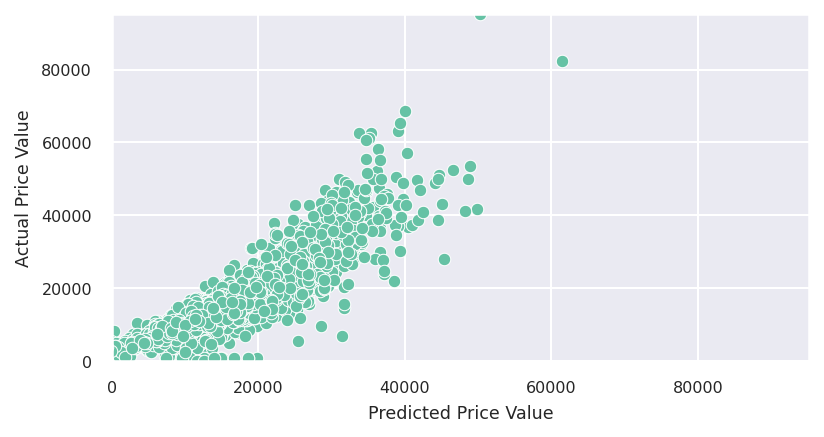

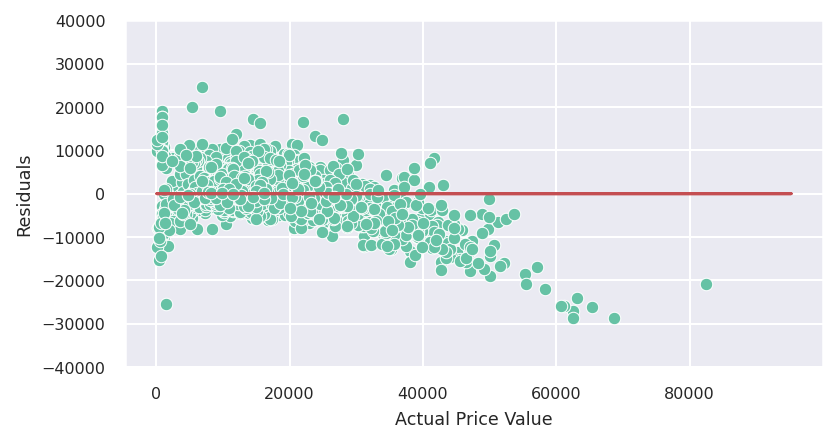

===== END: Training Performance =====


===== START: Test Performance =====
R^2 Score	:  0.74
MAPE Score	:  0.67
RMSE Score	:  4491.24



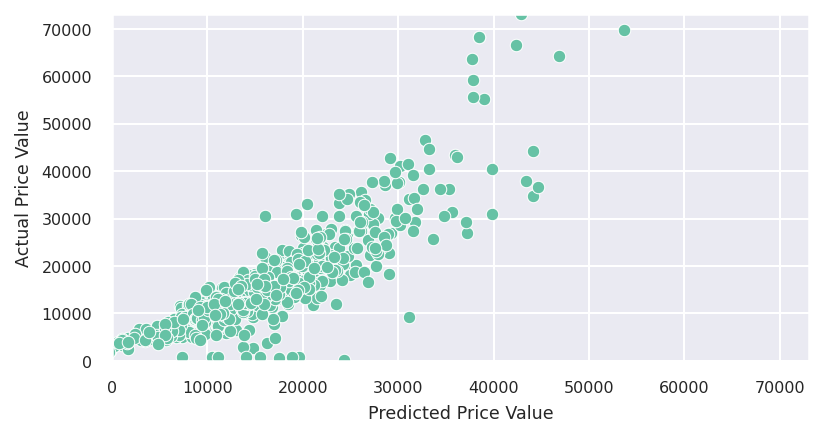

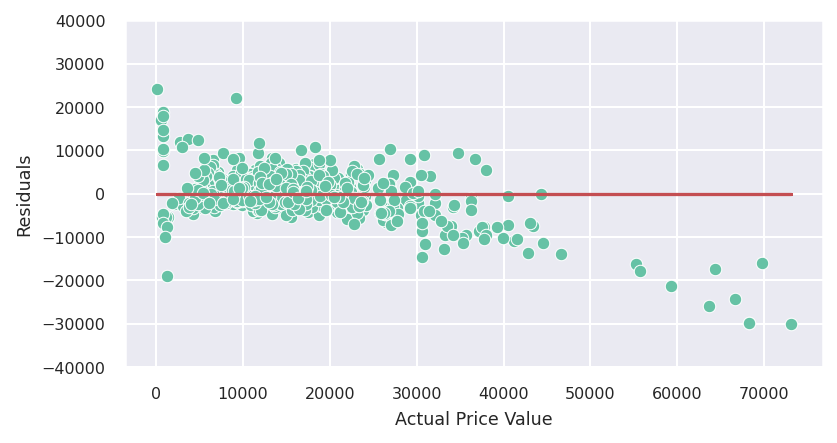

===== END: Test Performance =====


In [43]:
test__reg_model(LinearRegression())

##### Observations:
1. With a high MAPE value of 0.67 the mode is very off from predicting correct prices. Given the simplistic nature of Linear Regression, this almost expected for a dataset with the complex intricate relationships showing in the Descriptive Analysis.
2. Predicted Price Values seem to have a larger error towards the higher end of the actual prices, and seem to be lower than the Actual Price Values.

#### Model 2: Decision Tree Regressor

Decision Regression Trees are a useful non-parametric method of predicting outcomes. At some basic level, these can seem to evaluate factors based on how humans would make decisions since they are in a way nested if-else logical blocks. They can be visualised and help understand major factors of importance. Due to the nature of decision trees, predictor variables can be evaluated and reevaluated to a very deep degree to the point of overfitting to training data and getting 100% accuracy if not optimised correctly. One advantage of using trees is that they don't try to generalise assumptions or trends over an entire dataset or set of variables. They break the data into chunks based on the best logical separators which have the best sense of accuracy, and can narrow down very specific scenarios and combinations of variable values that lead to accurate predictions.




Properties of new split datasets:

    Dataset       Shape  Percent
0  Original  (4839, 45)    100.0
1   x_train  (3871, 44)     80.0
2   y_train   (968, 44)     80.0
3    x_test     (3871,)     20.0
4    y_test      (968,)     20.0

===== START: Training Performance =====
R^2 Score	:  1.0
MAPE Score	:  0.0
RMSE Score	:  0.0



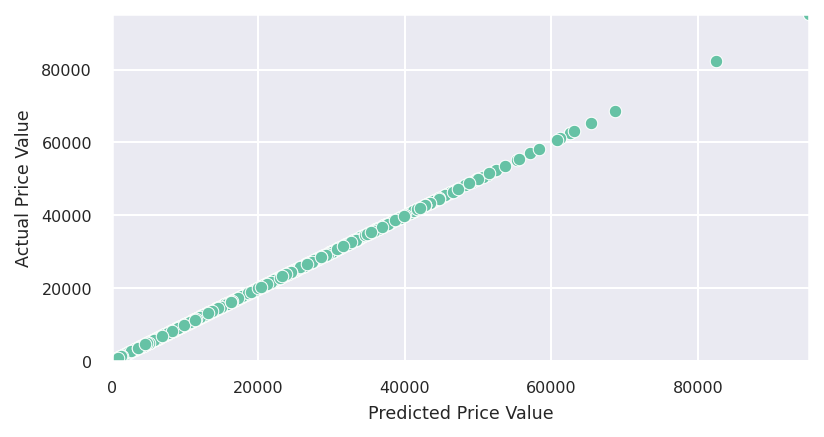

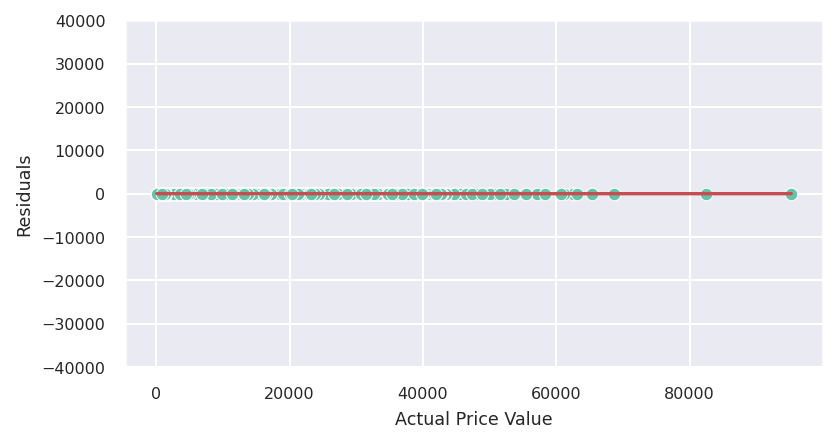

===== END: Training Performance =====


===== START: Test Performance =====
R^2 Score	:  0.71
MAPE Score	:  0.76
RMSE Score	:  4713.96



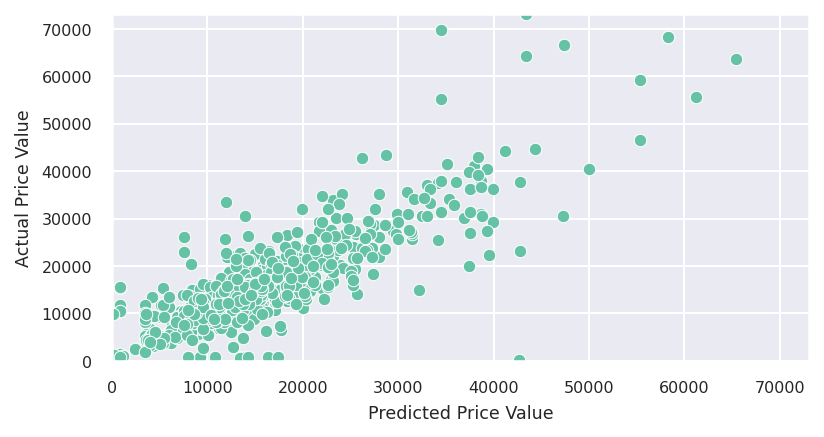

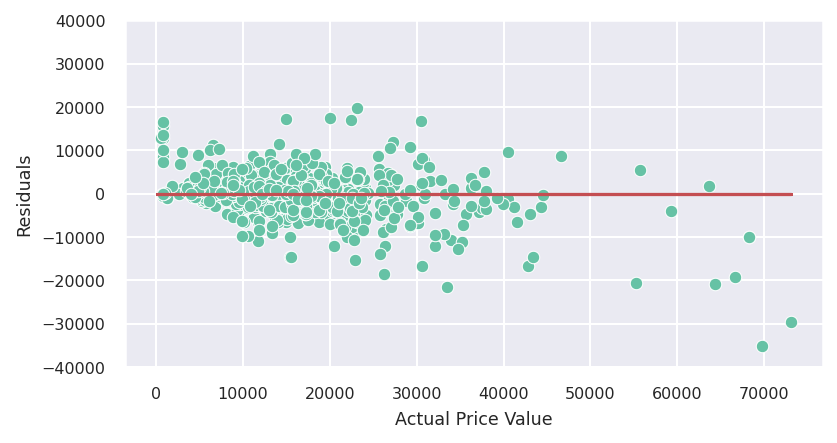

===== END: Test Performance =====


In [44]:
test__reg_model(algo=tree.DecisionTreeRegressor())

##### Observations:
1. Left unleashed, a standard Decision Regression Tree is prone to overfitting on Training Data as is the case here. This could potentially negatively impact Test Data Performance.

##### Steps to be taken:
1. Initiate a Hyperparameter search to find the optimial balance between Train and Test Data Performance

In [45]:
gs = hps_tree(tree.DecisionTreeRegressor(),
 {'max_depth':range(1, 15),
  'max_features':range(1, 15)})

Fitting 5 folds for each of 196 candidates, totalling 980 fits
{'max_depth': 10, 'max_features': 12}
-2750.88326770262


##### Best Model
Best Params: {'max_depth': 11, 'max_features': 14}

Properties of new split datasets:

    Dataset       Shape  Percent
0  Original  (4839, 45)    100.0
1   x_train  (3871, 44)     80.0
2   y_train   (968, 44)     80.0
3    x_test     (3871,)     20.0
4    y_test      (968,)     20.0

===== START: Training Performance =====
R^2 Score	:  0.93
MAPE Score	:  0.23
RMSE Score	:  2219.45



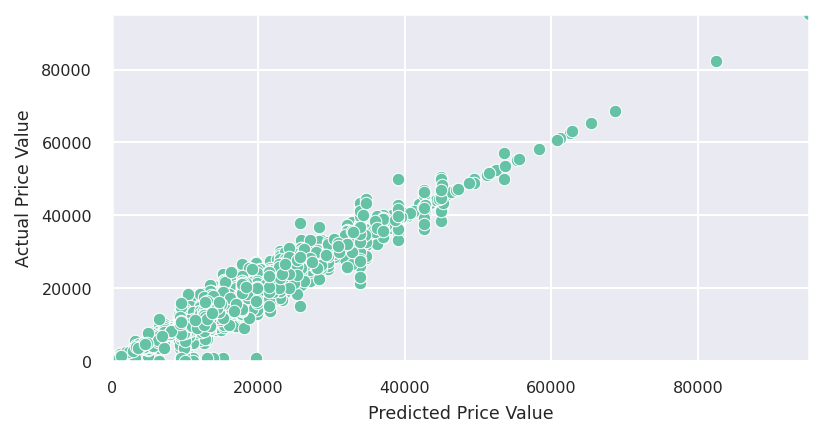

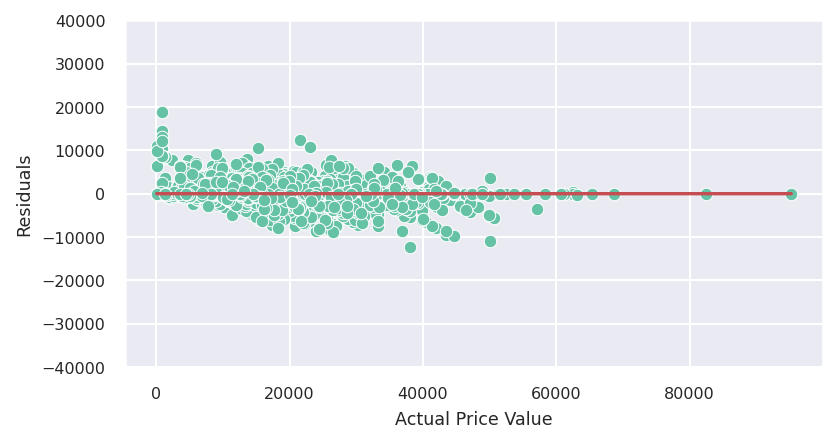

===== END: Training Performance =====


===== START: Test Performance =====
R^2 Score	:  0.75
MAPE Score	:  0.77
RMSE Score	:  4423.41



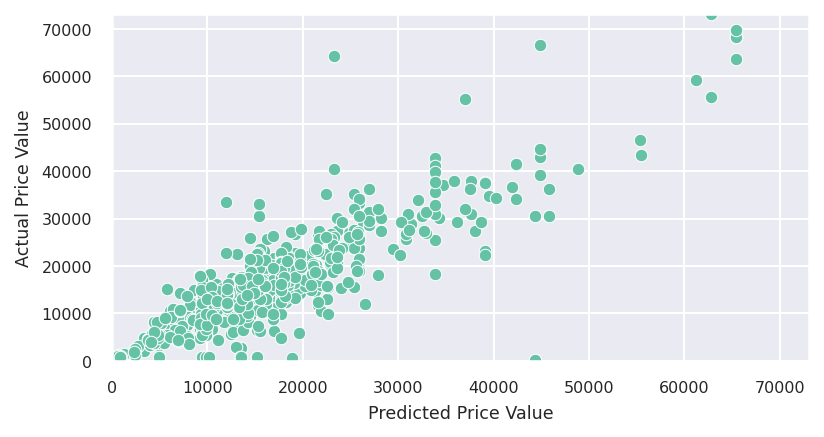

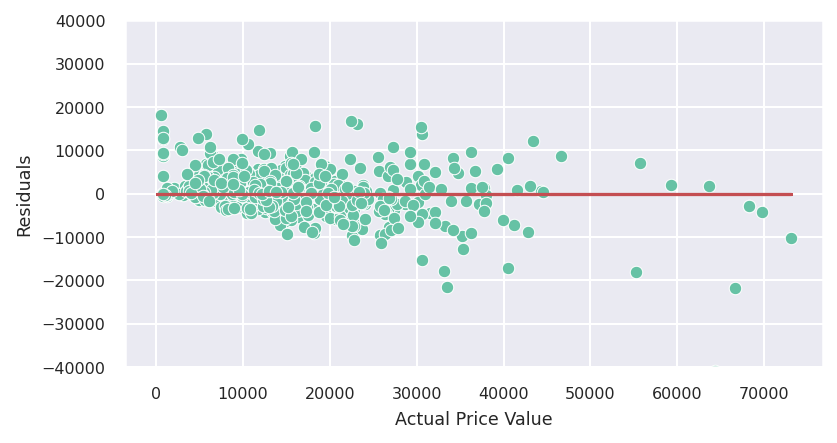

===== END: Test Performance =====


In [46]:
test__reg_model(algo=tree.DecisionTreeRegressor(max_depth=11, max_features=14))

##### Observations:
1. After chosing the preferred hyperparameters, the best scores achieved with the Decision Tree Regressor was R^2 = 0.69, MAPE = 0.45 and RMSE of 4411.28 dollars. This is a minor improvement over the default settings of the. model.

#### Model 3: Gradient Boosting Regressor


Properties of new split datasets:

    Dataset       Shape  Percent
0  Original  (4839, 45)    100.0
1   x_train  (3871, 44)     80.0
2   y_train   (968, 44)     80.0
3    x_test     (3871,)     20.0
4    y_test      (968,)     20.0

===== START: Training Performance =====
R^2 Score	:  0.9
MAPE Score	:  0.36
RMSE Score	:  2743.06



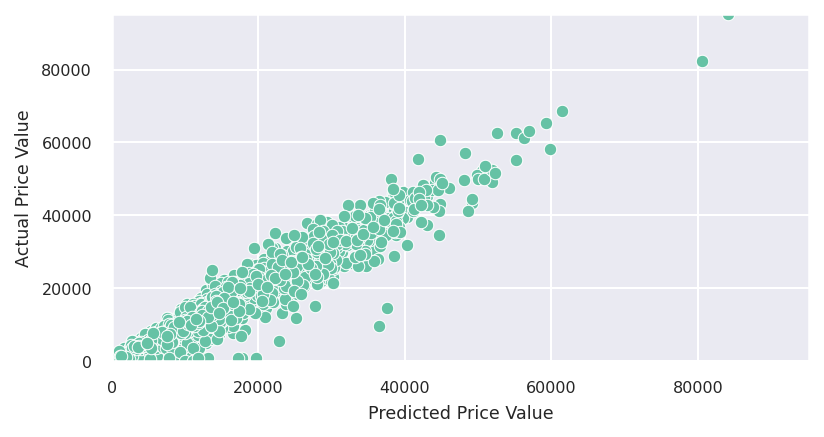

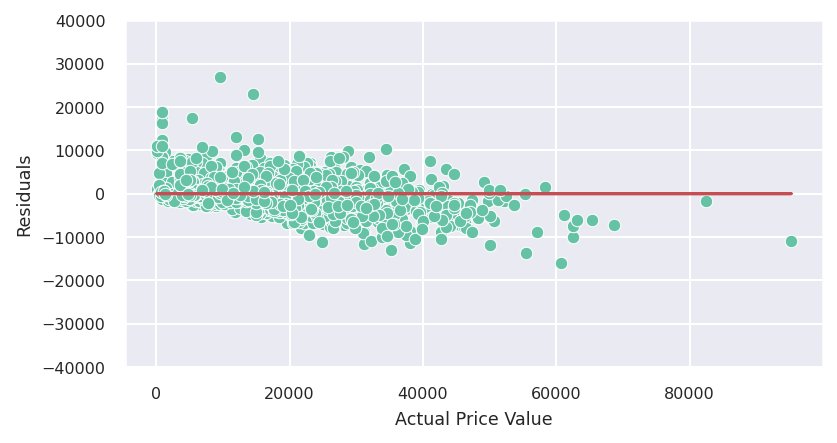

===== END: Training Performance =====


===== START: Test Performance =====
R^2 Score	:  0.85
MAPE Score	:  0.63
RMSE Score	:  3404.45



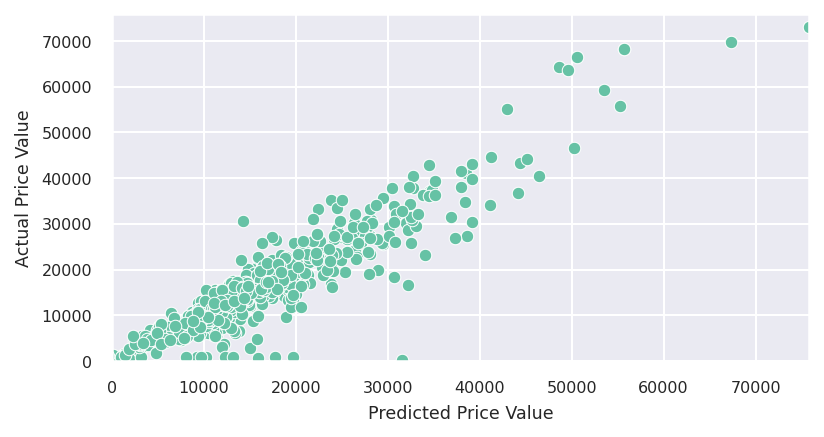

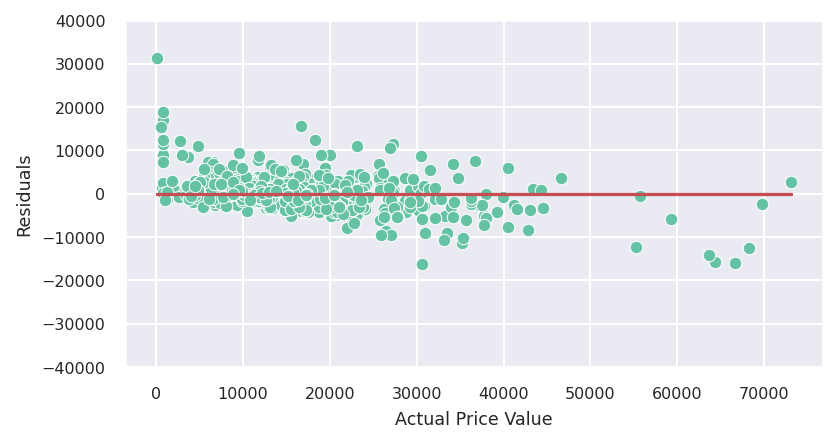

===== END: Test Performance =====


In [47]:
test__reg_model(GradientBoostingRegressor())

In [48]:
gs = hps_tree(GradientBoostingRegressor(),
 {'max_depth':range(1, 10),
  'max_features':range(1, 10)})

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 7, 'max_features': 8}
-1956.3001598917976


##### Best Model
Best Params: {'max_depth': 7, 'max_features': 9}

Properties of new split datasets:

    Dataset       Shape  Percent
0  Original  (4839, 45)    100.0
1   x_train  (3871, 44)     80.0
2   y_train   (968, 44)     80.0
3    x_test     (3871,)     20.0
4    y_test      (968,)     20.0

===== START: Training Performance =====
R^2 Score	:  0.97
MAPE Score	:  0.21
RMSE Score	:  1568.32



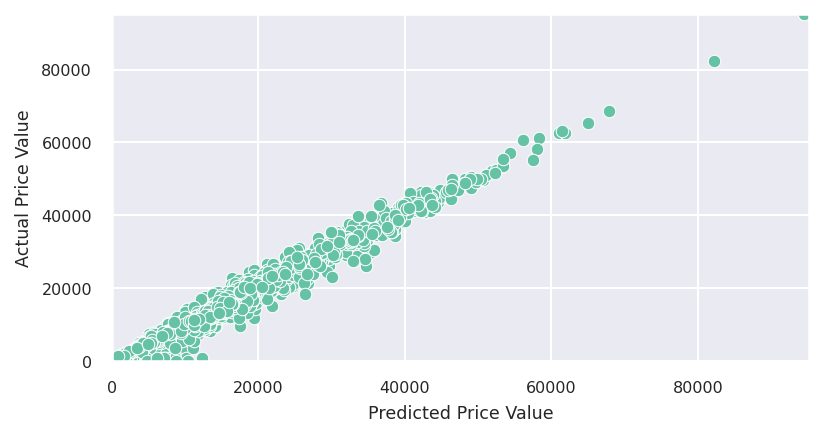

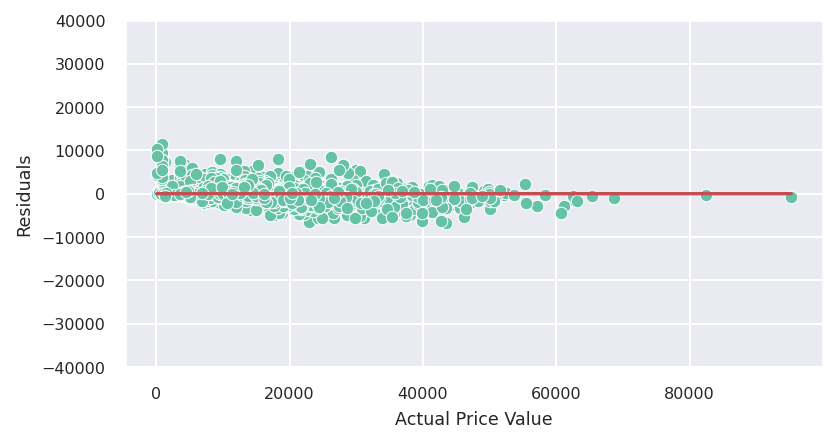

===== END: Training Performance =====


===== START: Test Performance =====
R^2 Score	:  0.86
MAPE Score	:  0.59
RMSE Score	:  3318.51



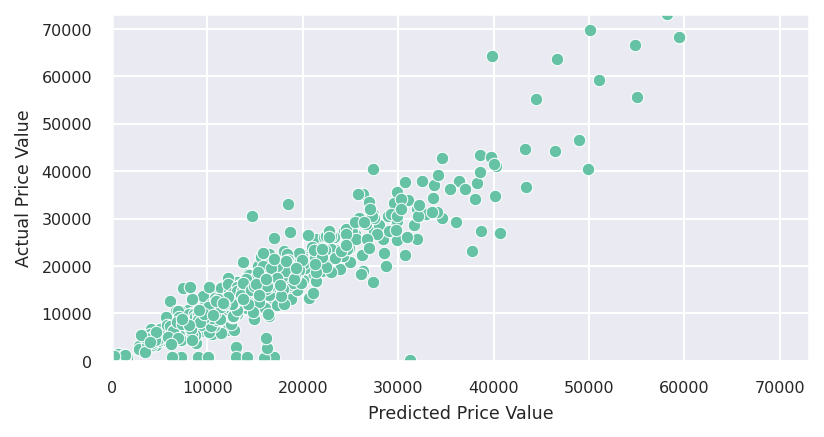

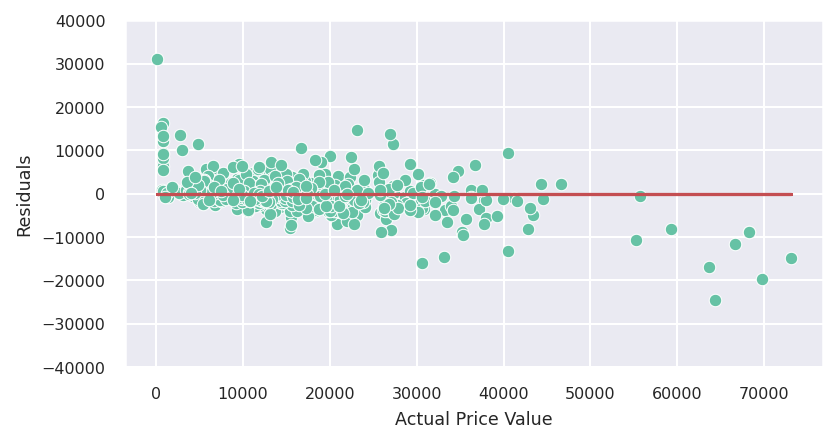

===== END: Test Performance =====


In [49]:
test__reg_model(GradientBoostingRegressor(max_depth=7, max_features=11))

##### Observations:
1. After chosing the preferred hyperparameters, the best scores achieved with the Gradient Boosting Regressor was R^2 = 0.85, MAPE = 0.58 and RMSE = 3316.43 dollars which is a slight improvement over the default model.

#### Model 4: XGBoost


Properties of new split datasets:

    Dataset       Shape  Percent
0  Original  (4839, 45)    100.0
1   x_train  (3871, 44)     80.0
2   y_train   (968, 44)     80.0
3    x_test     (3871,)     20.0
4    y_test      (968,)     20.0

===== START: Training Performance =====
R^2 Score	:  0.98
MAPE Score	:  0.16
RMSE Score	:  1204.7



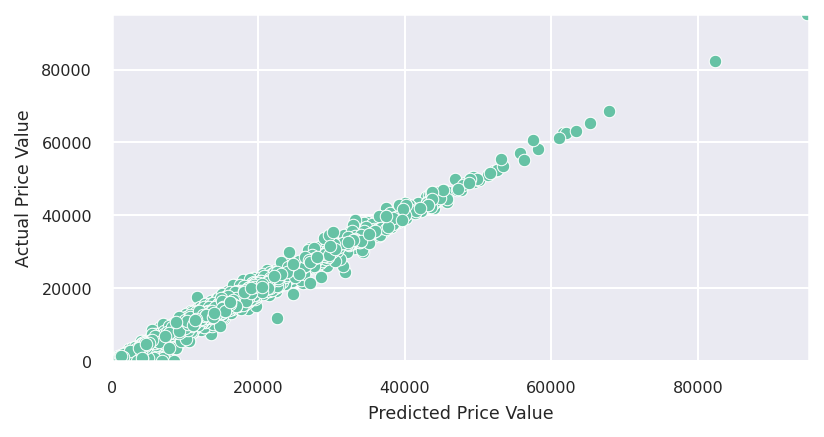

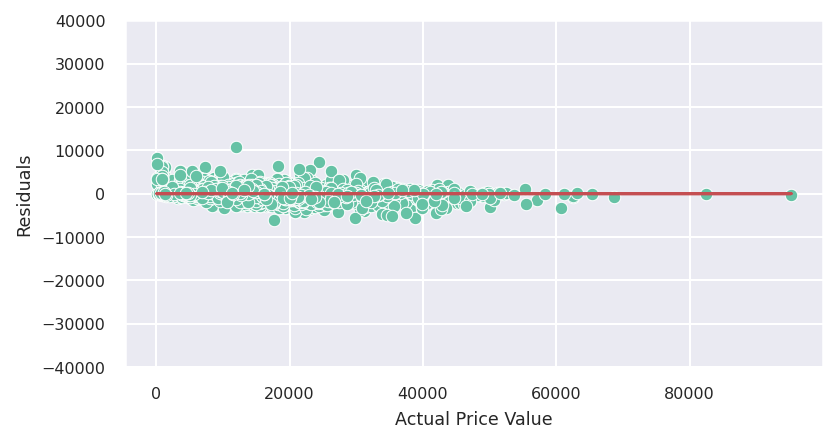

===== END: Training Performance =====


===== START: Test Performance =====
R^2 Score	:  0.84
MAPE Score	:  0.61
RMSE Score	:  3508.28



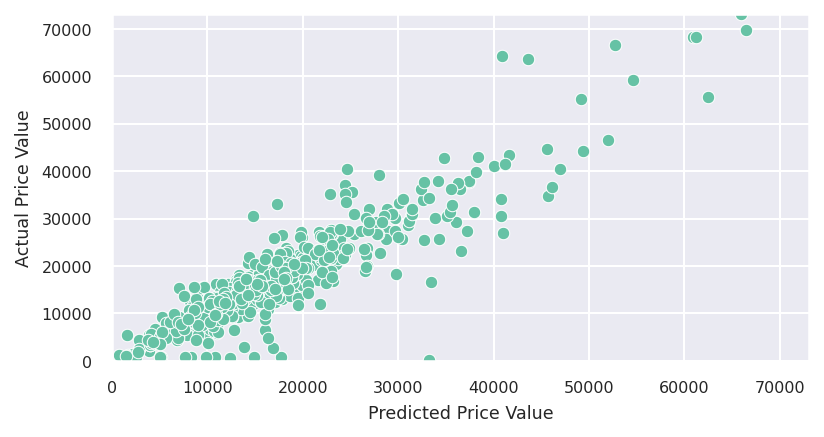

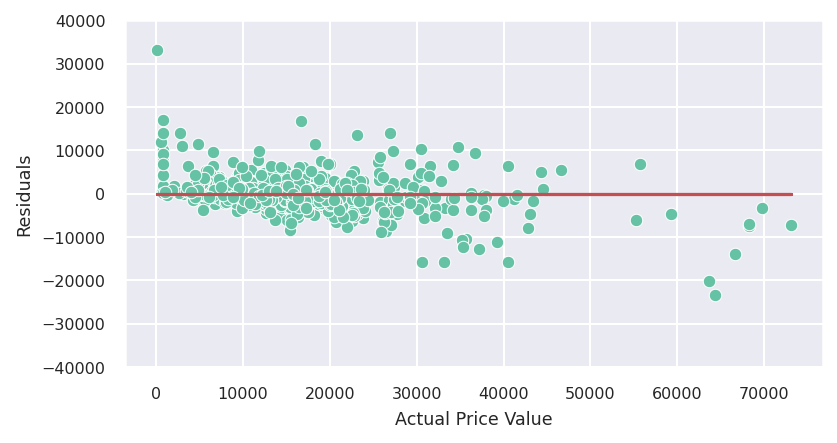

===== END: Test Performance =====


In [50]:
test__reg_model(algo=XGBRegressor())

In [51]:
gs = hps_tree(XGBRegressor(),
 {'max_depth':range(1, 10)})

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 4}
-2068.0599705002924


##### Best Model
Best Params: {'max_depth': 4}

Properties of new split datasets:

    Dataset       Shape  Percent
0  Original  (4839, 45)    100.0
1   x_train  (3871, 44)     80.0
2   y_train   (968, 44)     80.0
3    x_test     (3871,)     20.0
4    y_test      (968,)     20.0

===== START: Training Performance =====
R^2 Score	:  0.94
MAPE Score	:  0.28
RMSE Score	:  2036.19



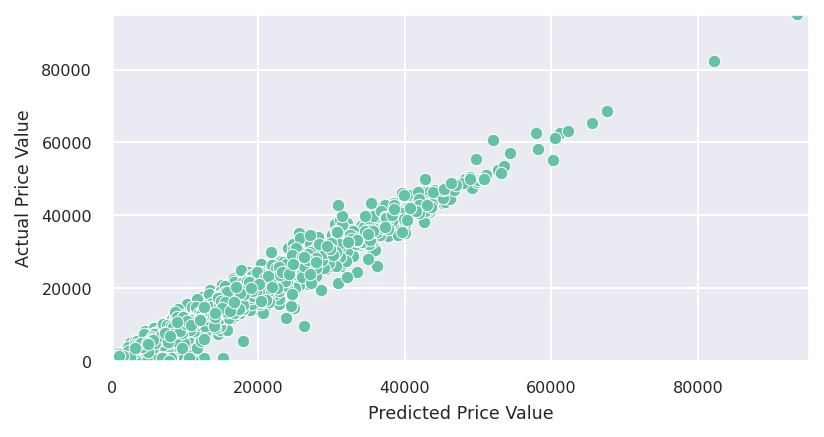

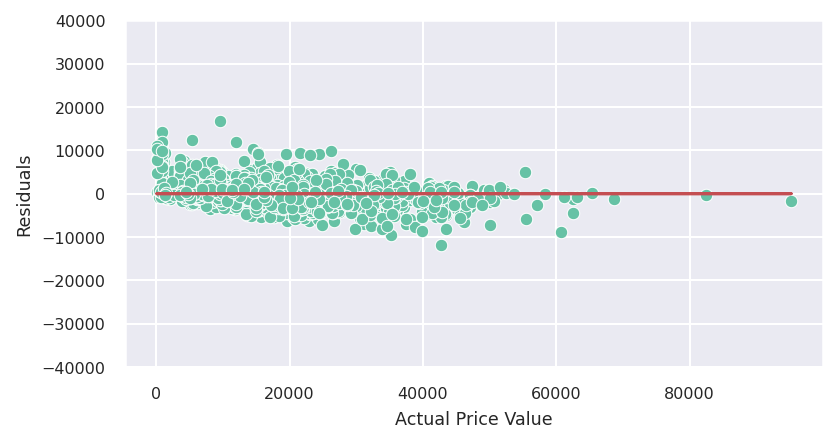

===== END: Training Performance =====


===== START: Test Performance =====
R^2 Score	:  0.85
MAPE Score	:  0.6
RMSE Score	:  3440.6



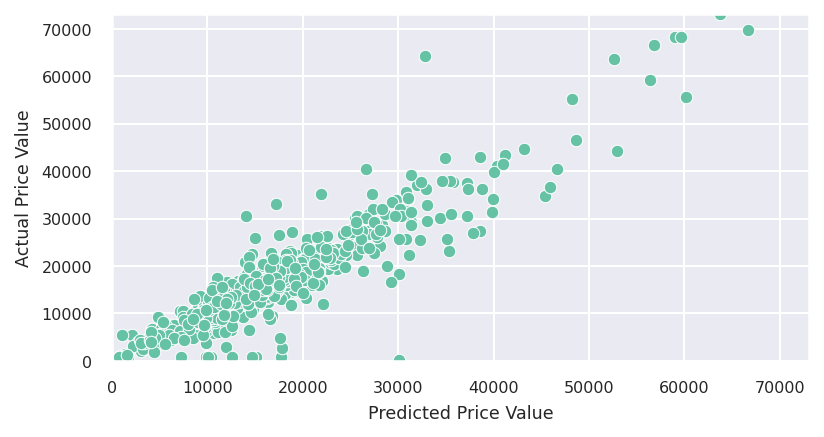

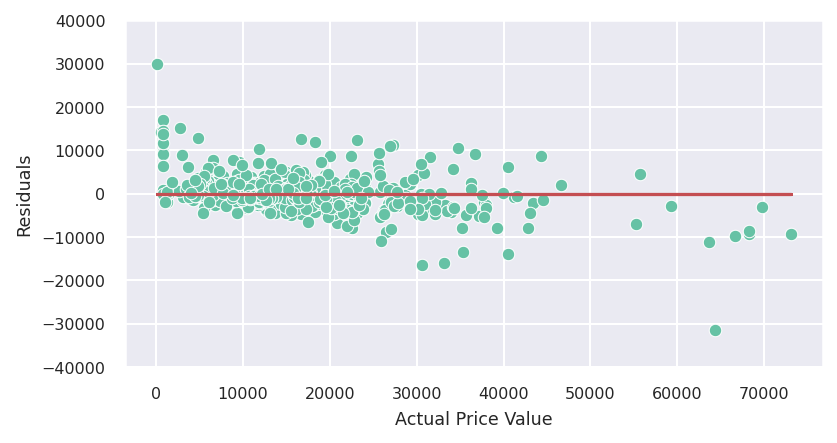

===== END: Test Performance =====


In [52]:
test__reg_model(algo=XGBRegressor(max_depth=4))

##### Observations:
1. After chosing the preferred hyperparameters, the best scores achieved with the XGBRegressor was R^2 = 0.85, MAPE = 0.6 and RMSE = 3440.6 dollars.

#### Observations from Models 1-4
The Performance Metrics are shown below:<br><br>
Note: Performance Metrics noted down may not equal actual Python output in all cases. Random seeds have been set in a few functions to minimise changes of variation in performance due to subsequent independent runs.

In [53]:
pd.DataFrame(
    {
        'Model#' : [1, 2, 3, 4],
        'Model'  : ['Linear Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'XGB Regressor'],
        'R^2'    : [0.74, 0.69, 0.85, 0.85],
        'MAPE'   : [0.67, 0.45, 0.68, 0.65],
        'RMSE'   : [4491.24, 4411.28, 3316.43, 3440.6]
    }
)

,Model#,Model,R^2,MAPE,RMSE
0,1,Linear Regression,0.74,0.67,4491.24
1,2,Decision Tree Regressor,0.69,0.45,4411.28
2,3,Gradient Boosting Regressor,0.85,0.68,3316.43
3,4,XGB Regressor,0.85,0.65,3440.60


Gradient Boosting Regressor and XGBoost Regressor seem to have similar performance, with Gradient Boosting Regressor edging it out in terms of RMSE. This model can be used for further investigation into Feature Importance.

##### Feature Importance
One advantage of using Tree based Models is that they can highlight Feature Importance in a dataset. In this case this could be used to highlight which feature is most significant when determining the price of a used BMW.

In [54]:
def plot_feature_imp(algo):
  # Split Data and create Dummy Variables
  x_train, y_train, x_test, y_test = split_data(pd.get_dummies(data_sales.drop(columns=['model_key'])), diagnostics=False)

  # Run Model on Training Data with Diagnostics
  model = algo.fit(x_train, y_train)

  # Store the importance factors of each variable in descending order
  feature_importance = pd.DataFrame(
      zip(x_train.columns, model.feature_importances_),
      columns=['feature', 'importance']
      ).sort_values('importance', ascending=False)

  # Print the most important features
  plt.title('Feature Importance')
  model1_plot_ensemble_featimp=sns.barplot(data=feature_importance.head(15), x='feature', y='importance')
  model1_plot_ensemble_featimp.set_xticklabels(model1_plot_ensemble_featimp.get_xticklabels(),rotation=90)


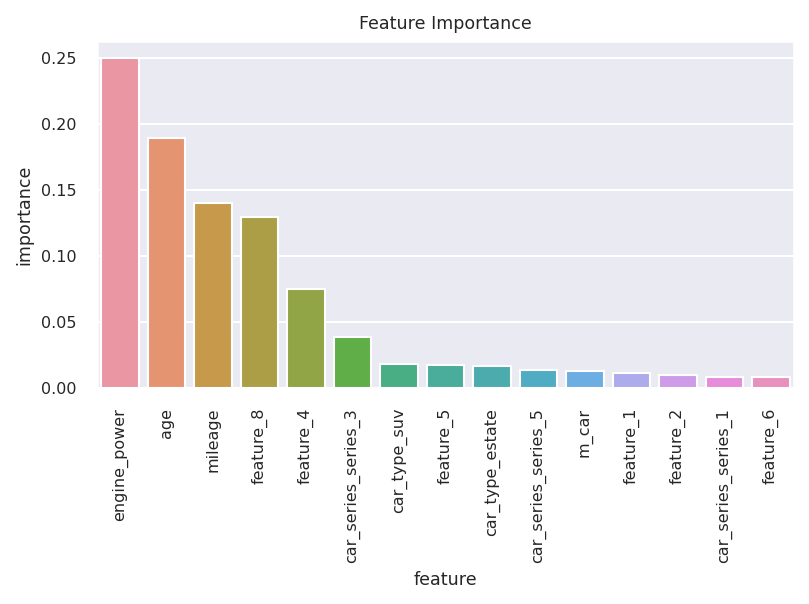

In [55]:
plot_feature_imp(GradientBoostingRegressor(max_depth=7, max_features=11))

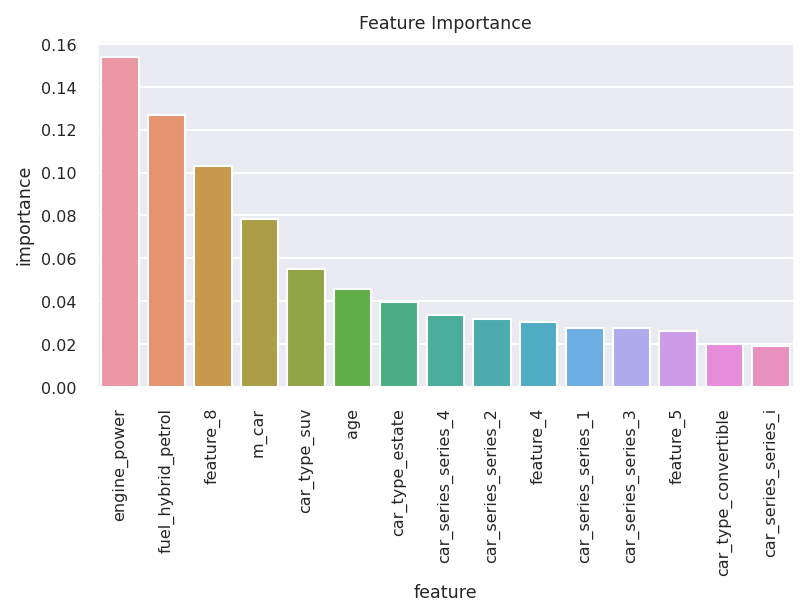

In [56]:
plot_feature_imp(XGBRegressor())

The Gradient Boosting Regressor and XGBoost Regressor both seem to suggest that **engine_power** is the most significant variable when deciding the **price** of a Used BMW. Other variables of significance by model are:
1. Gradient Boosting Regressor: **age**, **mileage**, **feature_8**, **feature_4**
2. XGBoost Regressor: **fuel_hybrid_petrol**, **feature_8**, **m_car**, **car_type_suv**

### Model 5: Neural Network


In [57]:
# Importing Packages to Standardise Data
from sklearn.preprocessing import RobustScaler

# Importing TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
# Split Data and create Dummy Variables
x_train, y_train, x_test, y_test = split_data(pd.get_dummies(data_sales.drop(columns=['model_key'])))

Properties of new split datasets:

    Dataset       Shape  Percent
0  Original  (4839, 45)    100.0
1   x_train  (3871, 44)     80.0
2   y_train   (968, 44)     80.0
3    x_test     (3871,)     20.0
4    y_test      (968,)     20.0



In [59]:
# Using RobustScaler to Standardise the Data
scaler = RobustScaler().fit(x_train)

x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [60]:
model_nn = Sequential()
model_nn.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(len(x_train.keys()),)))
model_nn.add(tf.keras.layers.Dense(128, activation='relu'))
model_nn.add(tf.keras.layers.Dense(64, activation='relu'))
model_nn.add(tf.keras.layers.Dense(32, activation='relu'))
model_nn.add(tf.keras.layers.Dense(16, activation='relu'))
model_nn.add(tf.keras.layers.Dense(1))

In [61]:
model_nn.compile(loss='mape',
              optimizer='adam',
              metrics=['mape']
              )

In [62]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='mape', patience=5,
                                               restore_best_weights=True,
                                               verbose=1)

In [63]:
history=model_nn.fit(x_train_scaled, y_train, validation_split=0.1, epochs=150, callbacks=[es_callback])

Epoch 1/150
109/109 [==============================] - 3s 10ms/step - loss: 91.7971 - mape: 91.7971 - val_loss: 105.1129 - val_mape: 105.1129
Epoch 2/150
109/109 [==============================] - 1s 7ms/step - loss: 47.6122 - mape: 47.6122 - val_loss: 72.6656 - val_mape: 72.6656
Epoch 3/150
109/109 [==============================] - 1s 7ms/step - loss: 36.5959 - mape: 36.5959 - val_loss: 72.5461 - val_mape: 72.5461
Epoch 4/150
109/109 [==============================] - 1s 7ms/step - loss: 34.4973 - mape: 34.4973 - val_loss: 72.5949 - val_mape: 72.5949
Epoch 5/150
109/109 [==============================] - 0s 4ms/step - loss: 33.2120 - mape: 33.2120 - val_loss: 70.4051 - val_mape: 70.4051
Epoch 6/150
109/109 [==============================] - 0s 4ms/step - loss: 32.3677 - mape: 32.3677 - val_loss: 70.2994 - val_mape: 70.2994
Epoch 7/150
109/109 [==============================] - 1s 5ms/step - loss: 31.5194 - mape: 31.5194 - val_loss: 72.1746 - val_mape: 72.1746
Epoch 8/150
109/109 [===

In [64]:
def plot_loss(history):
  plt.plot(history.history['mape'], label='mape')
  plt.plot(history.history['val_mape'], label='val_mape')
  plt.xlabel('Epoch')
  plt.ylabel('Error %')
  plt.legend()
  plt.grid(True)

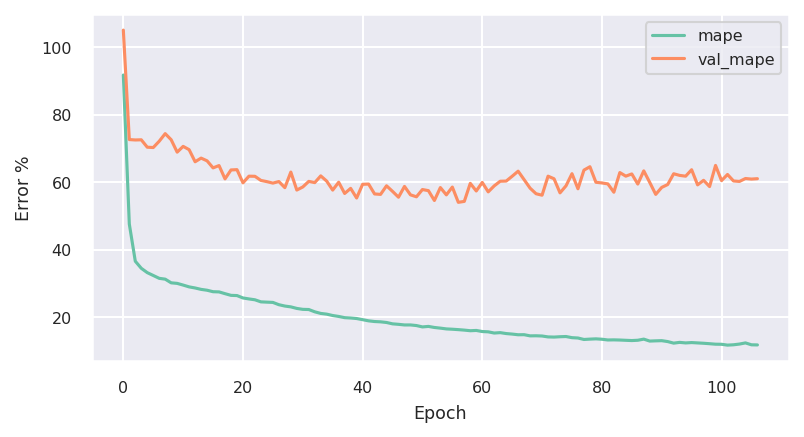

In [65]:
plot_loss(history)

In [66]:
model_nn.evaluate(x_test_scaled, y_test)

31/31 [==============================] - 0s 2ms/step - loss: 57.2855 - mape: 57.2855


[57.28546142578125, 57.28546142578125]

31/31 [==============================] - 0s 2ms/step
R^2 Score	:  0.81
MAPE Score	:  0.57
RMSE Score	:  3895.44



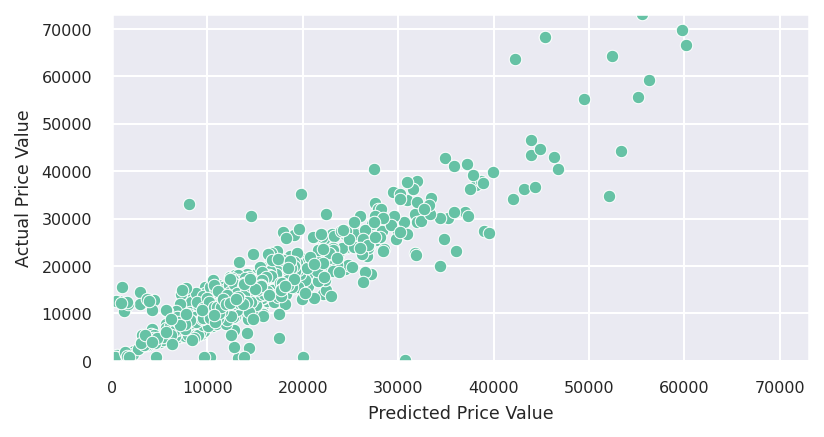

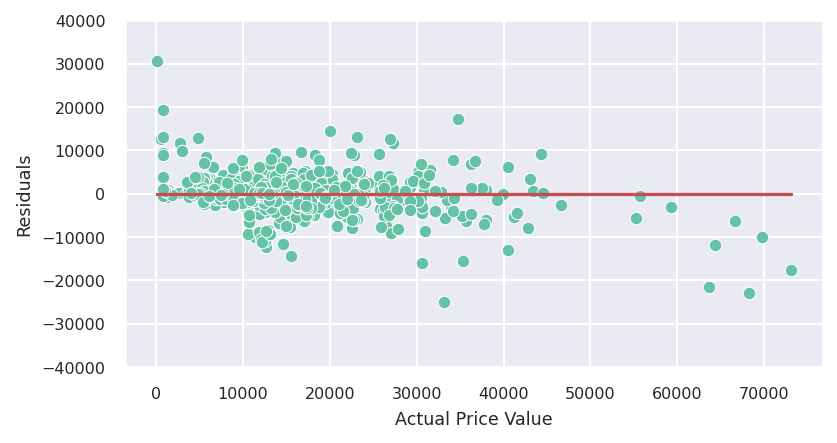

In [67]:
model_performance_summary(model_nn, x_test_scaled, y_test, diagnostics=True, plot=True, return_score_metrics=False)

#### Observations:
1. The Neural Network performed similarly to the other models with R^2 = 0.81, MAPE = 0.54 and RMSE = 3858.0 dollars.

## Conclusion
Following is the Model Performance Summary

In [68]:
model_performance = pd.DataFrame(
    {
        'Model#' : [1, 2, 3, 4, 5],
        'Model'  : ['Linear Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'XGB Regressor', 'Neural Network'],
        'R^2'    : [0.74, 0.69, 0.85, 0.85, 0.81],
        'MAPE'   : [0.67, 0.45, 0.68, 0.65, 0.54],
        'RMSE'   : [4491.24, 4411.28, 3316.43, 3440.6, 3858.0]
    }
)
model_performance

,Model#,Model,R^2,MAPE,RMSE
0,1,Linear Regression,0.74,0.67,4491.24
1,2,Decision Tree Regressor,0.69,0.45,4411.28
2,3,Gradient Boosting Regressor,0.85,0.68,3316.43
3,4,XGB Regressor,0.85,0.65,3440.60
4,5,Neural Network,0.81,0.54,3858.00


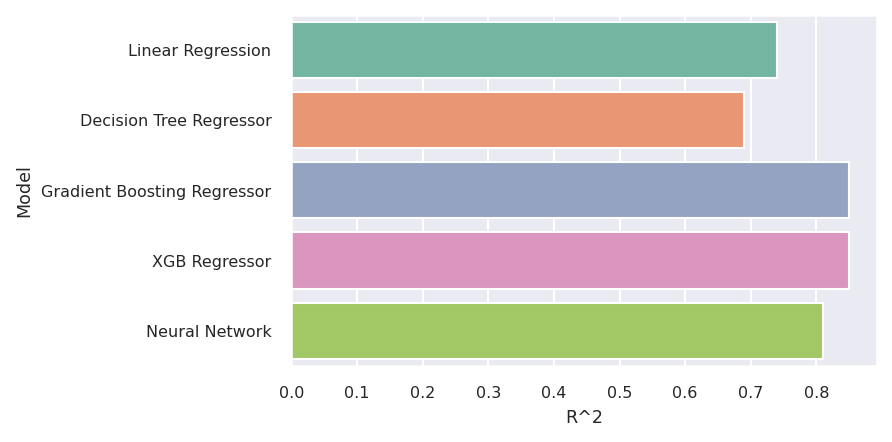

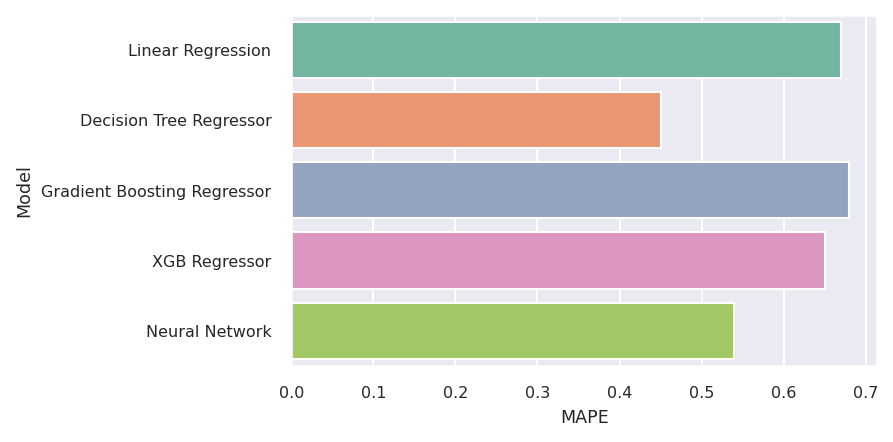

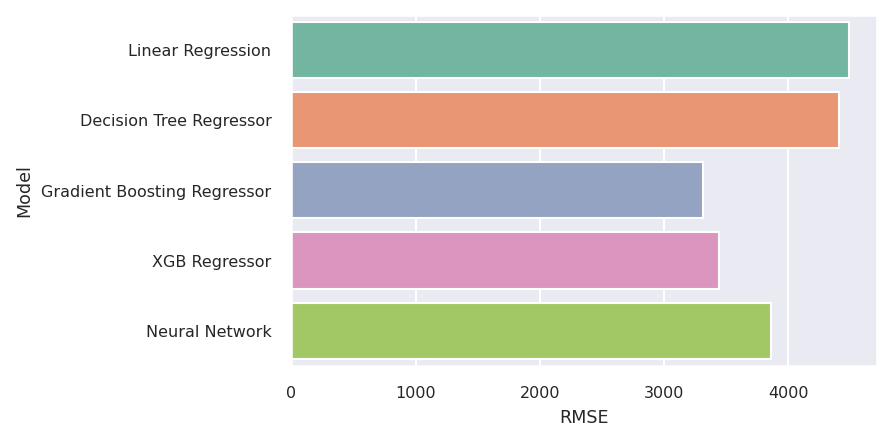

In [69]:
# Visualise distributions of all numeric values through boxplots
for i, col in enumerate(model_performance.drop(columns='Model#').select_dtypes(include=numerics).columns):

  sns.barplot(data=model_performance.drop(columns='Model#'), y='Model', x=col)
  plt.tight_layout()
  plt.show()

It could be said that overall, XGBoost performed the most favourably. Although the RMSE was a little higher than Gradient Boosting, it was not too different as compared with the other models. Moreover it has highest R^2 value implying that is has the bet statistical fit to the data although a high MAPE.